## Final Project Submission

* Please fill out:
* John Paul Hernandez Alcala
* Part Time
* Scheduled project review date/time: 
* Instructor name: Eli
* Blog post URL:


### Libraries used

In [3]:
#!pip install omdb #if not installed already

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import omdb
import itertools as it
from datetime import datetime, date
from matplotlib.patches import Rectangle
import numpy as np

%matplotlib inline  

## Bringing in OMDb and R.O.I. Data to Merge into One Dataset

First we are going to bring in the movie budget dataframe we obtained from [MovieBudgetData.ipynb](./MovieBudgetData.ipynb) to join the data obtained from OMDb API in [OMDb_Data.ipynb](OMDb_Data.ipynb).

### Movie Budget Data: R.O.I.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5126 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5126 non-null   int64 
 1   release_date       5126 non-null   object
 2   movie              5126 non-null   object
 3   production_budget  5126 non-null   int64 
 4   domestic_gross     5126 non-null   int64 
 5   worldwide_gross    5126 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 280.3+ KB


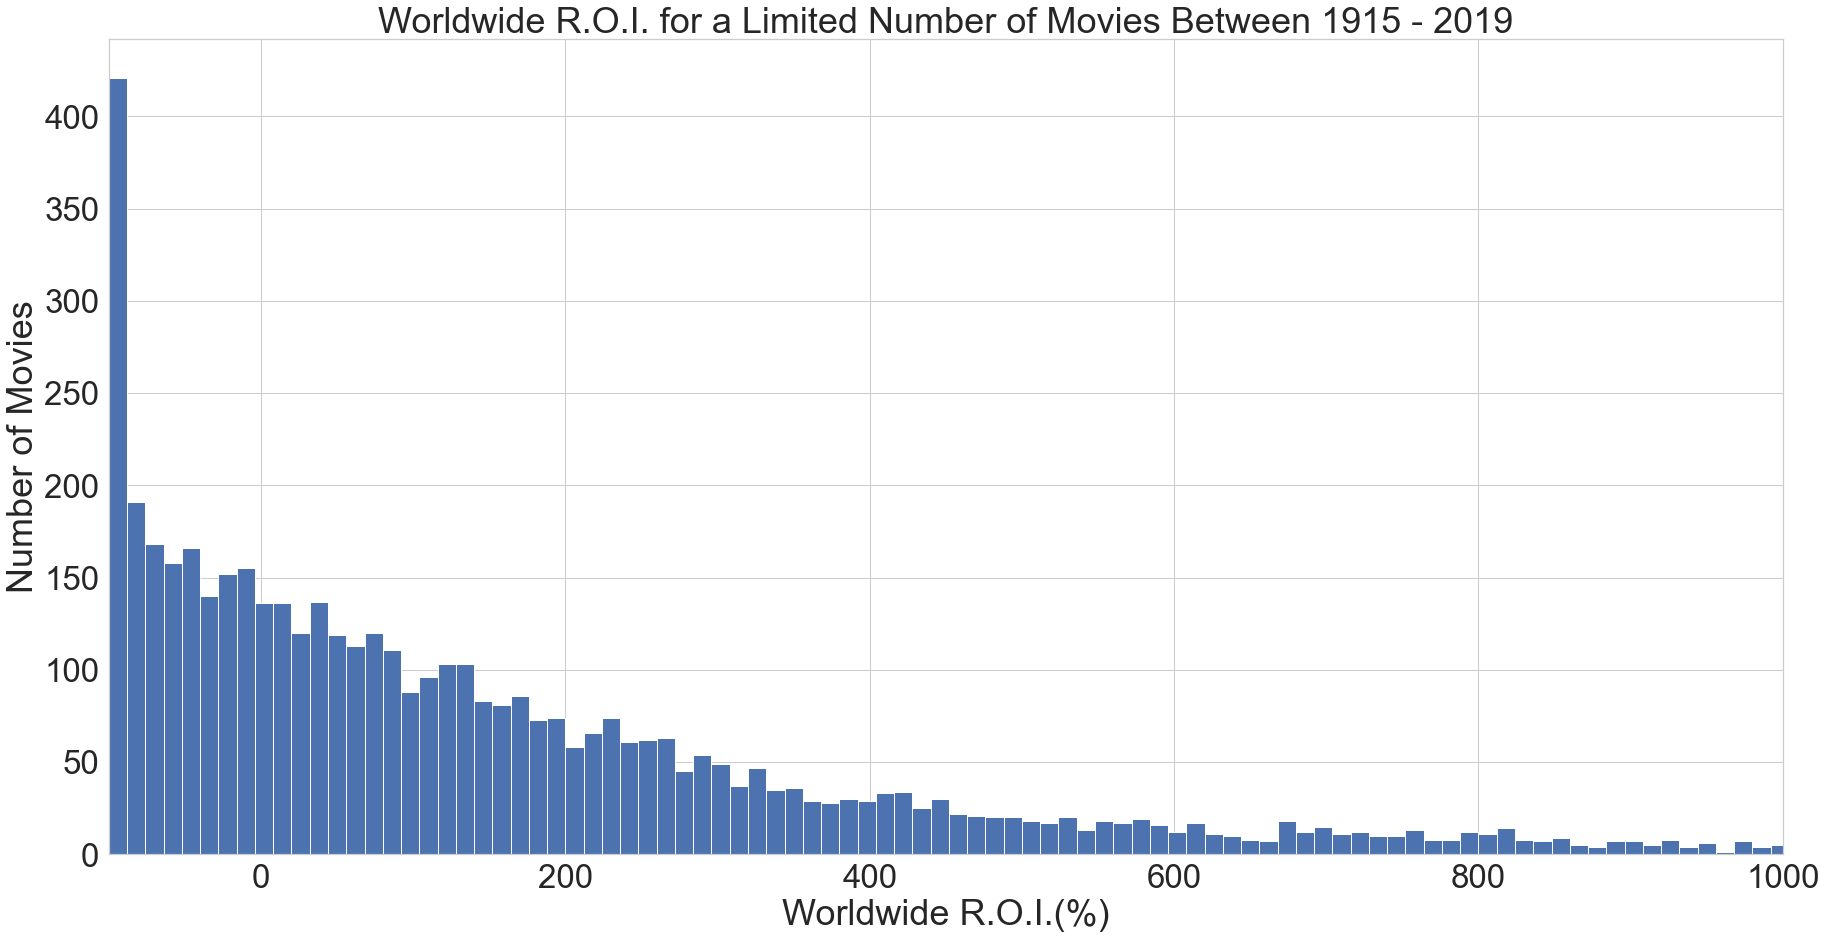

C:\Users\johnh\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 792x576 with 1 Axes>

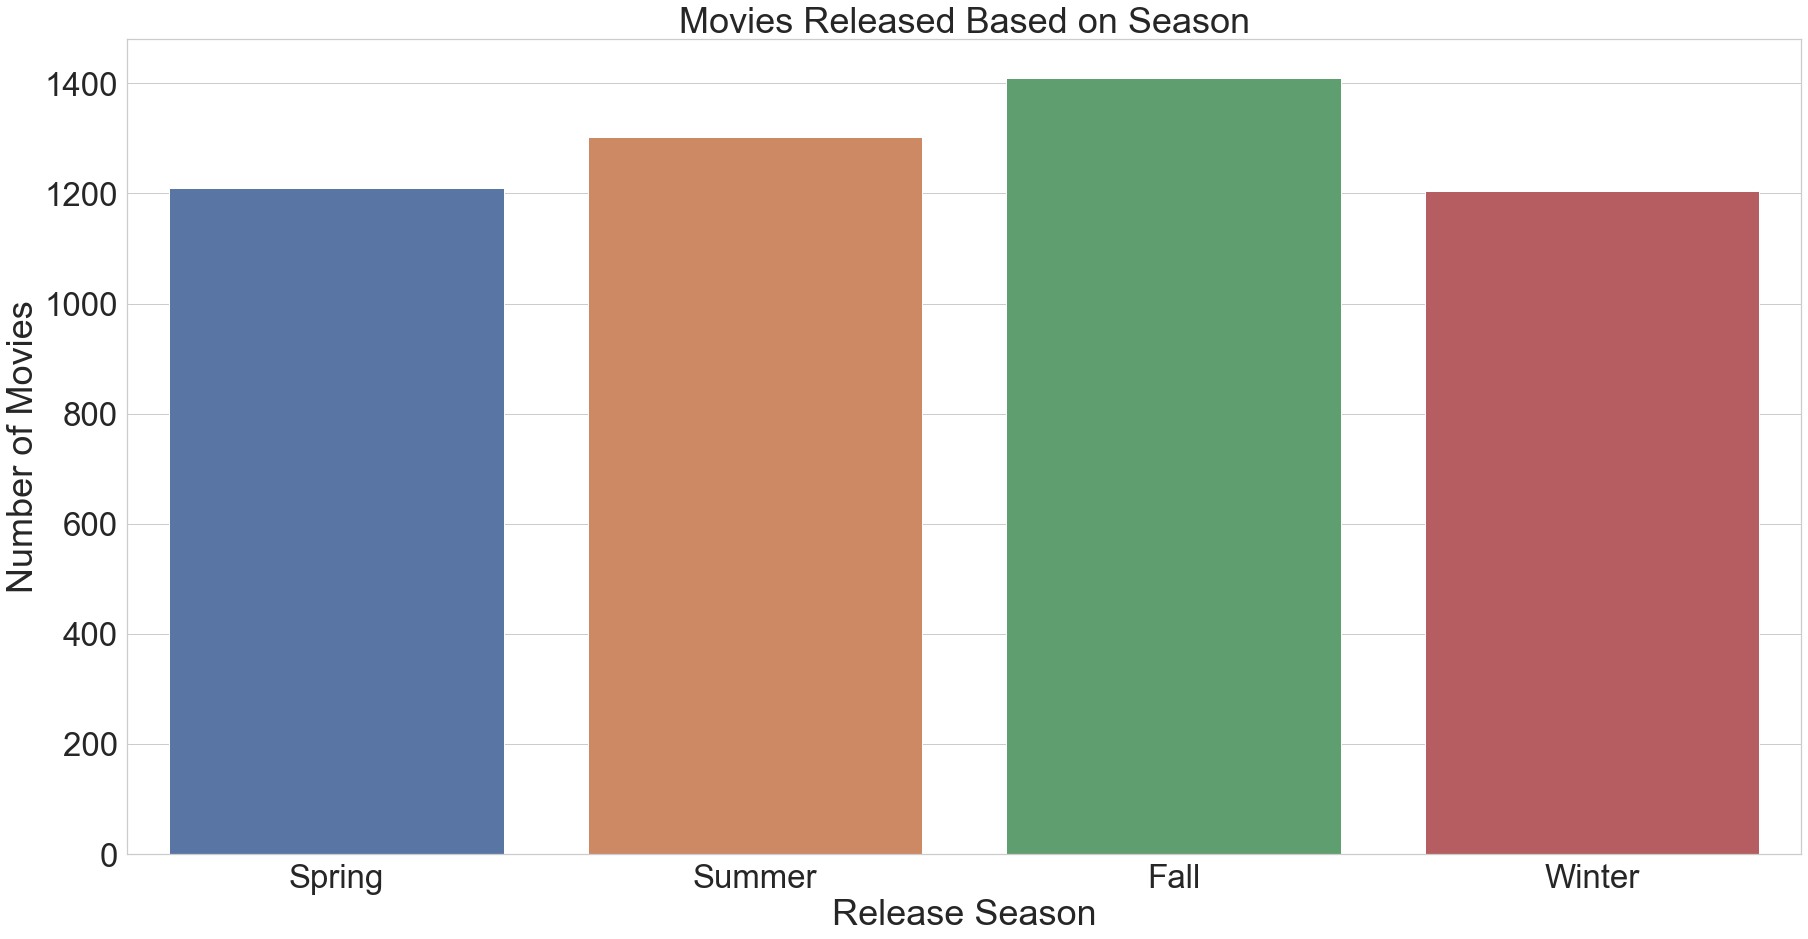

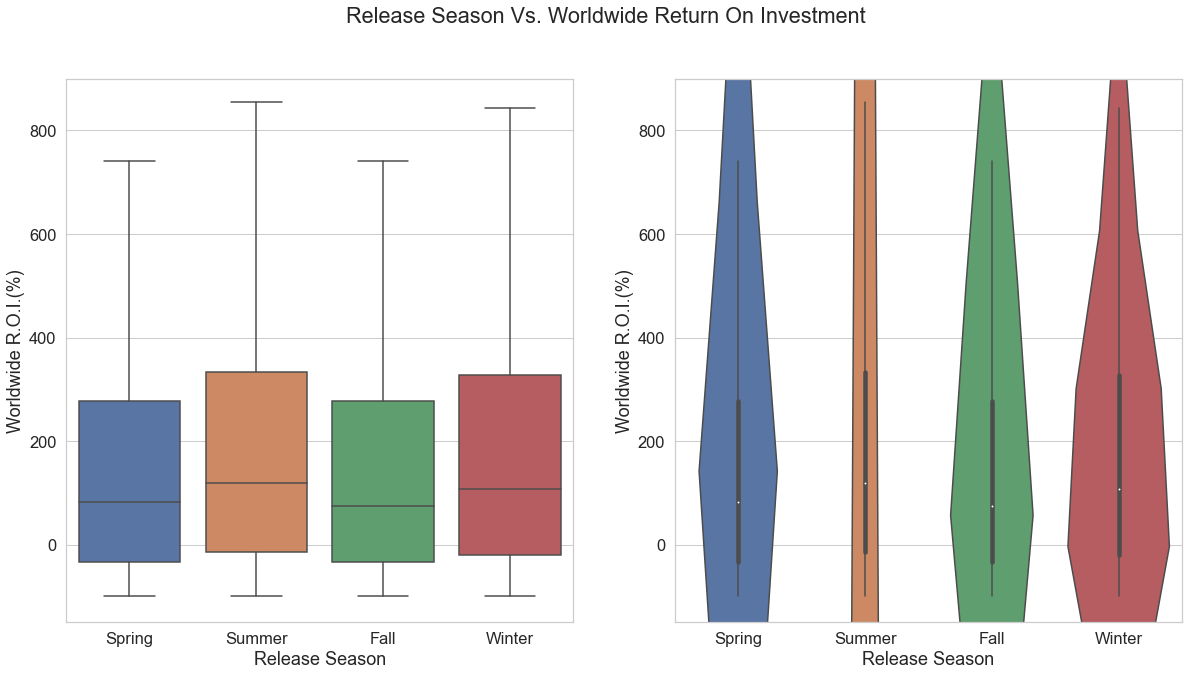

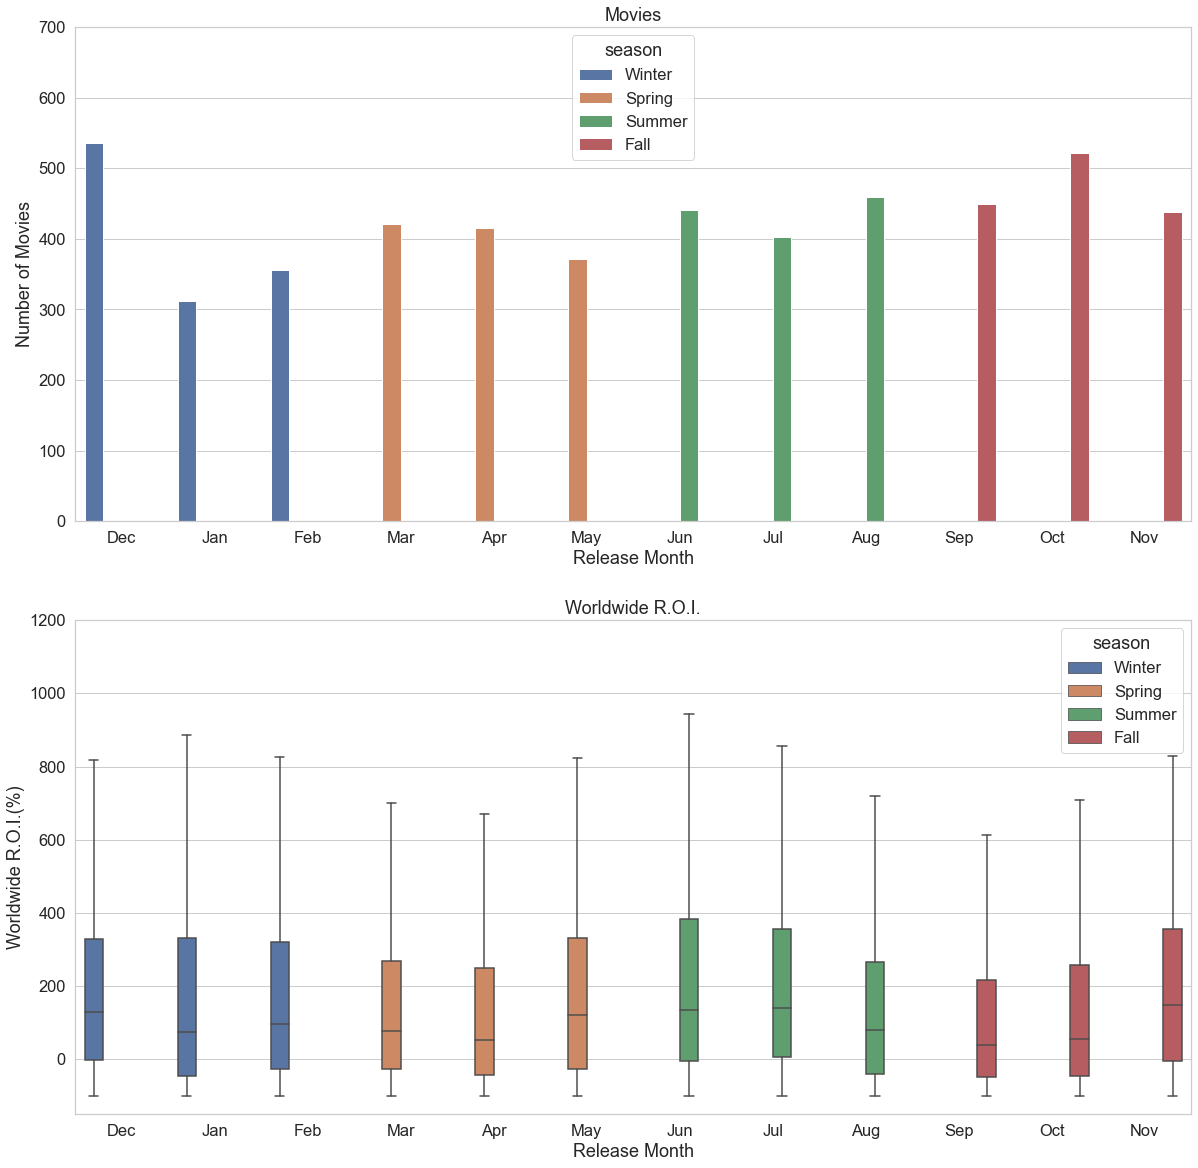

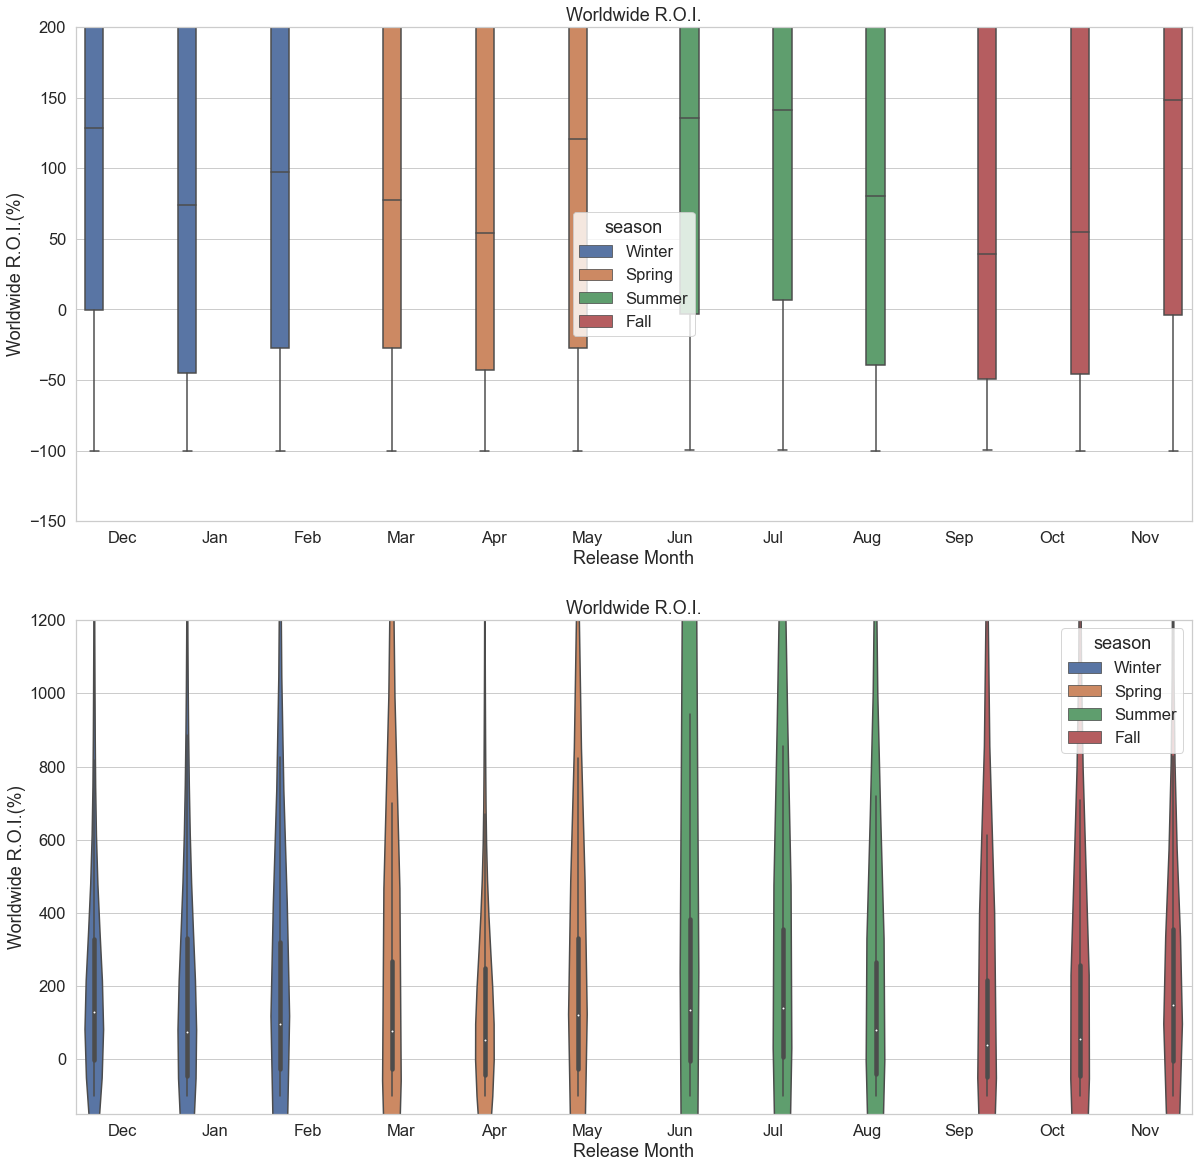

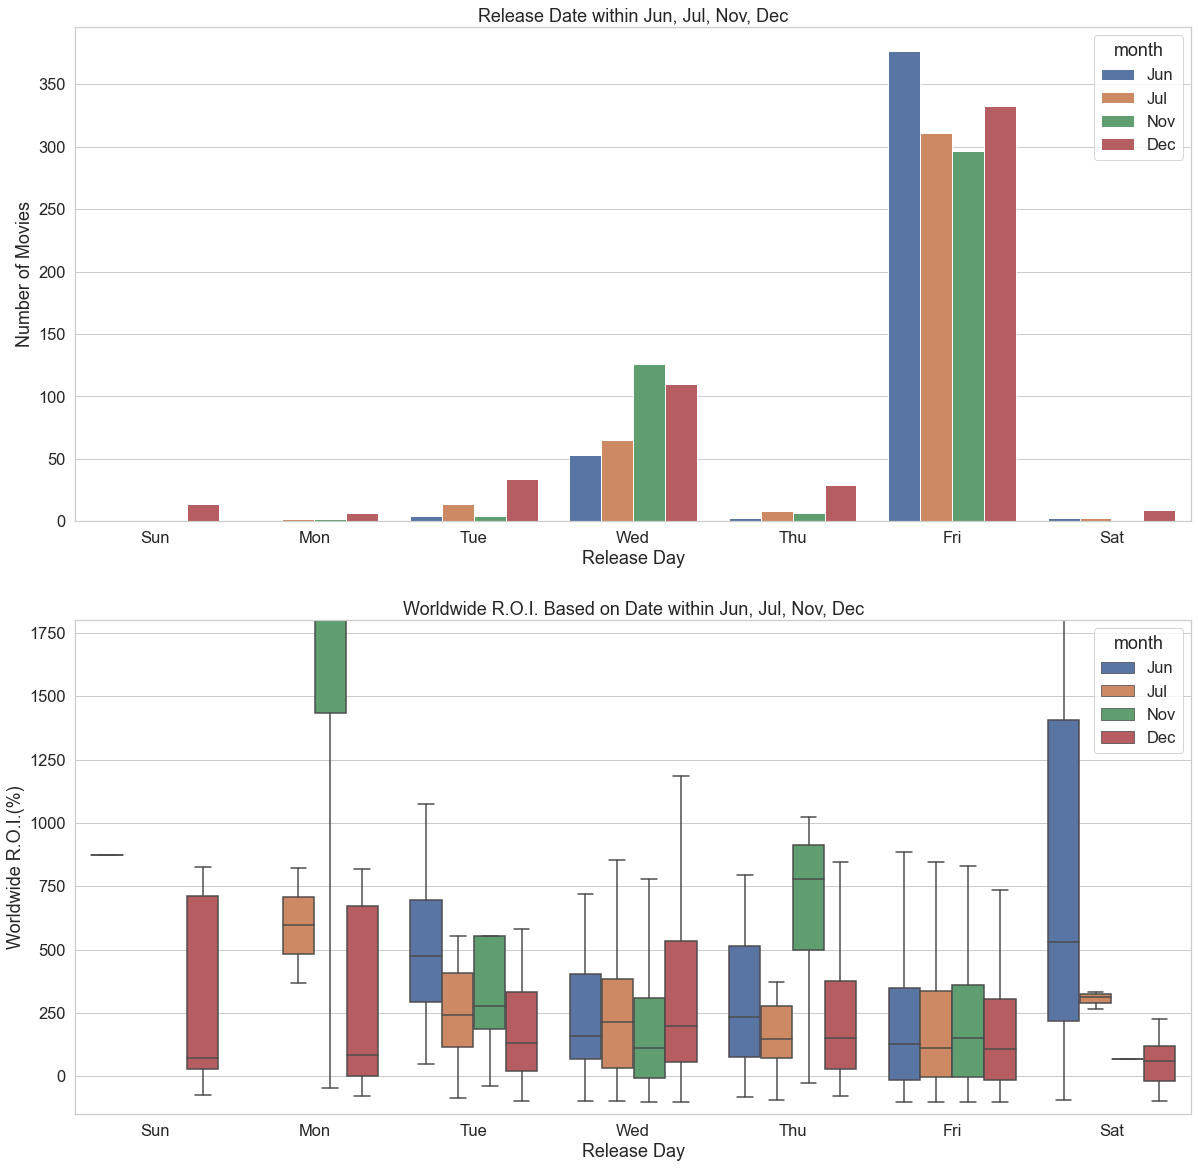

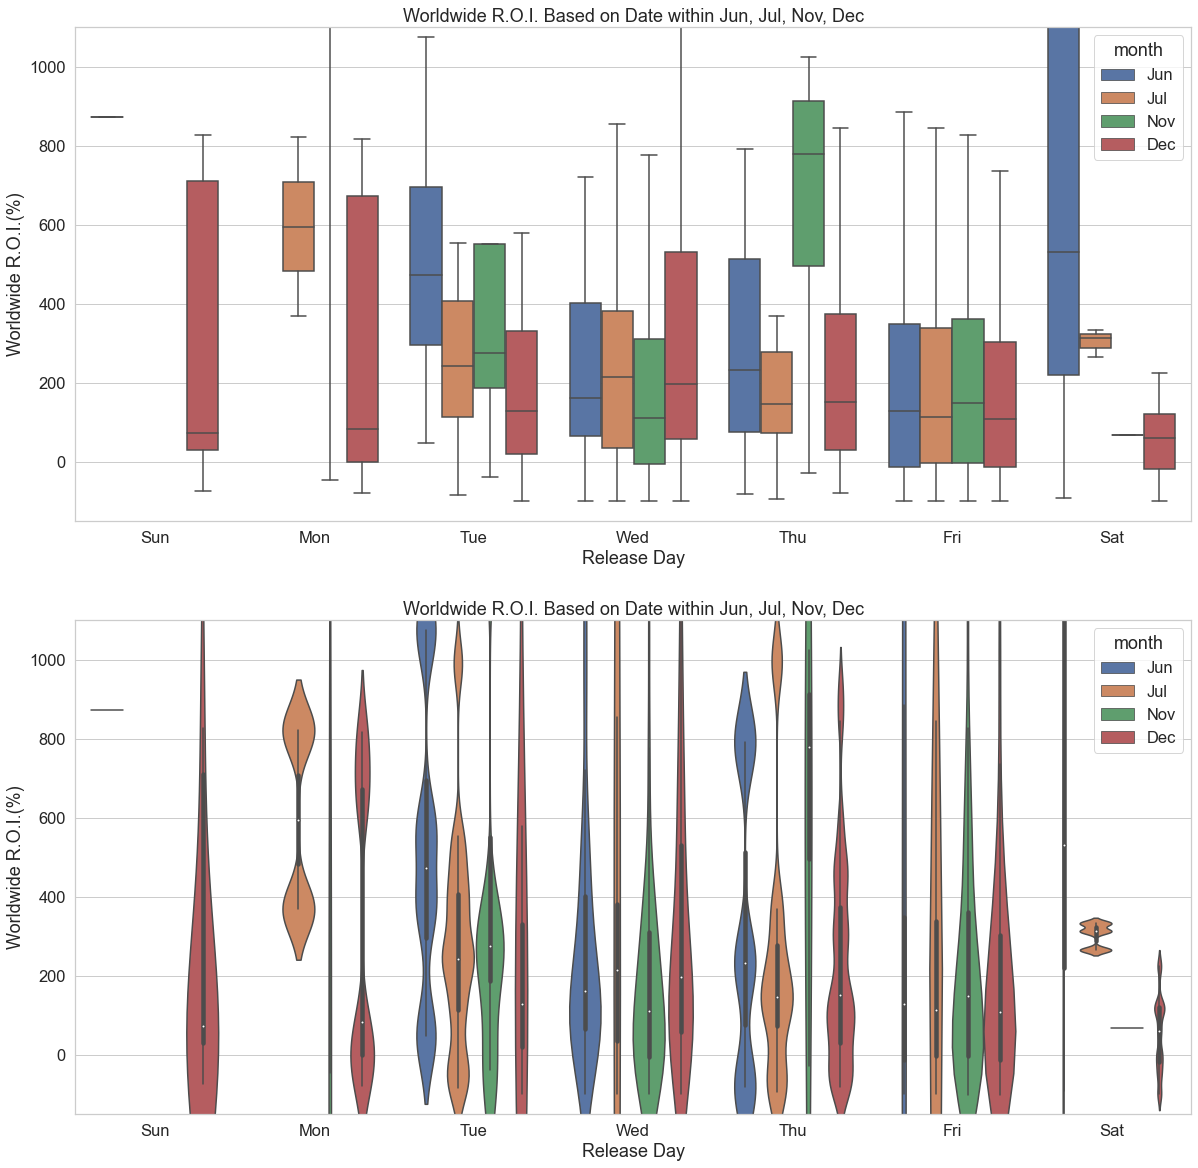

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5126 entries, 0 to 5125
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movie                5126 non-null   object 
 1   year                 5126 non-null   object 
 2   Worldwide R.O.I.(%)  5126 non-null   float64
dtypes: float64(1), object(2)
memory usage: 120.3+ KB
Stored 'dfROI' (DataFrame)


In [24]:
#Run jupyter notebook folder to define necessary variables
#%% capture 
%run ./MovieBudgetAnalysis.ipynb #capture output of file ran.

In [6]:
%store -r dfROI
dfROI.head() #retrieve stored variable and output head

,movie,year,Worldwide R.O.I.(%)
0,Avatar,2009,553.257713
1,Pirates of the Caribbean: On Stranger Tides,2011,154.667286
2,Dark Phoenix,2019,-57.210757
3,Avengers: Age of Ultron,2015,324.384139
4,Star Wars Ep. VIII: The Last Jedi,2017,315.369636


In [5]:
dfROI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5126 entries, 0 to 5125
Data columns (total 3 columns):
movie                  5126 non-null object
year                   5126 non-null object
Worldwide R.O.I.(%)    5126 non-null float64
dtypes: float64(1), object(2)
memory usage: 120.3+ KB


### OMDb Data

In [134]:
df0 = pd.read_csv('./ImprovedReadyOMDbAPIData', index_col=0) #read in data into dataframe

In [135]:
dfOMDb = df0.reset_index(drop=True) #reset index

In [136]:
dfOMDb.tail(10)

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production
4933,Romance and Cigarettes,1999,R,14 Apr 1999,84 min,"Drama, Romance",Catherine Breillat,Catherine Breillat (scenario and dialogue),"Caroline Ducey, Sagamore Stévenin, François Be...",Frustrated by the lack of intimacy in her rela...,...,https://m.media-amazon.com/images/M/MV5BNjY4ND...,"[{'Source': 'Internet Movie Database', 'Value'...",49.0,5.3,"10,112",tt0194314,movie,08 Feb 2000,"$1,585,642",NaN
4934,The Work and the Glory: American Zion,2017,Not Rated,08 Sep 2017,89 min,Documentary,"Jairus McLeary, Gethin Aldous(co-director)",NaN,"Eldra 'Vegas' III Jackson, Alvin 'Bud' Wheeler...","Set inside a single room in Folsom Prison, thr...",...,https://m.media-amazon.com/images/M/MV5BMjI2Zm...,"[{'Source': 'Internet Movie Database', 'Value'...",84.0,7.8,"2,104",tt5836866,movie,NaN,"$5,853",Blanket Fort Media
4935,Dolphins and Whales Tribes of the Ocean 3D,2000,Not Rated,14 Apr 2000,39 min,"Documentary, Short",Greg MacGillivray,"Tim Cahill, Stephen Judson","Pierce Brosnan, Alejandro Acevedo-Gutiérrez, D...","Experience how dolphins live and play, and unr...",...,https://m.media-amazon.com/images/M/MV5BMTA0Nz...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,7.3,459,tt0263278,movie,30 Nov 2016,NaN,NaN
4936,Pat Garrett and Billy the Kid,1973,R,23 May 1973,122 min,"Biography, Drama, Western",Sam Peckinpah,Rudy Wurlitzer,"James Coburn, Kris Kristofferson, Richard Jaec...",Pat Garrett is hired as a lawman on behalf of ...,...,https://m.media-amazon.com/images/M/MV5BNDU3ND...,"[{'Source': 'Internet Movie Database', 'Value'...",53.0,7.3,"18,289",tt0070518,movie,01 Jan 2008,NaN,Metro Goldwyn Mayer
4937,Ira and Abby,2018,NaN,16 Mar 2018,139 min,"Crime, Mystery, Thriller",Saiju S.S.,Naveen John,"Unni Mukundan, Gokul Suresh, Shankar Ramakrish...","Aryan is like every other lover, who finds the...",...,https://m.media-amazon.com/images/M/MV5BNjVjNm...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,6.9,725,tt7601308,movie,NaN,NaN,NaN
4938,Travellers and Magicians,1992,NaN,01 Feb 1994,90 min,Drama,Bahram Beizai,Bahram Beizai,"Mozhdeh Shamsai, Homa Rusta, Jamileh Sheikhi, ...",A young woman's wedding becomes a ritual of mo...,...,https://m.media-amazon.com/images/M/MV5BMTU0Mj...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,7.4,906,tt0104919,movie,NaN,NaN,NaN
4939,Celeste and Jesse Forever,2018,TV-14,06 Feb 2019,105 min,"Drama, Music",Ben Hackworth,"Bille Brown, Ben Hackworth","Radha Mitchell, Thomas Cocquerel, Nadine Garne...",Celeste is a love story set in the tropical sp...,...,https://m.media-amazon.com/images/M/MV5BYTQyMz...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,5.5,159,tt5705306,movie,29 May 2019,NaN,Unicorn Films
4940,Lovely and Amazing,2012,NaN,30 Mar 2012,139 min,Romance,Jaya B.,"Jaya B. (story & screenplay), Shyam Manohar (d...","Aadi, Shanvi Srivastava, Rajendra Prasad, Chin...",NaN,...,https://m.media-amazon.com/images/M/MV5BN2Y4Nm...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,5.4,155,tt2334727,movie,NaN,NaN,NaN
4941,"Peace, Propaganda and the Promised Land",2004,NaN,NaN,80 min,Documentary,"Sut Jhally, Bathsheba Ratzkoff","Sut Jhally, Bathsheba Ratzkoff","Seth Ackerman, Stav Adivi, Arik Ascherman, Han...",This video shows how the foreign policy intere...,...,https://m.media-amazon.com/images/M/MV5BMjA4OT...,"[{'Source': 'Internet Movie Database', 'Value'...",57.0,8.2,531,tt0428959,movie,NaN,"$4,930",NaN
4942,Smiling Fish and Goat on Fire,1999,R,10 Mar 2000,90 min,"Comedy, Romance",Kevin Jordan,"Kevin Jordan (story), Derick Martini (screenpl...","Derick Martini, Amy Hathaway, Steven Martini, ...",Two brothers share a house in the Fairfax dist...,...,https://m.media-amazon.com/images/M/MV5BMTQwOT...,"[{'Source': 'Internet Movie Database', 'Value'...",44.0,7.7,"2,663",tt0162348,movie,21 Aug 2001,"$278,492","Parabellum Product

In [139]:
dfOMDb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4943 entries, 0 to 4942
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       4943 non-null   object 
 1   Year        4943 non-null   object 
 2   Rated       4673 non-null   object 
 3   Released    4871 non-null   object 
 4   Runtime     4888 non-null   object 
 5   Genre       4932 non-null   object 
 6   Director    4856 non-null   object 
 7   Writer      4769 non-null   object 
 8   Actors      4907 non-null   object 
 9   Plot        4820 non-null   object 
 10  Language    4927 non-null   object 
 11  Country     4940 non-null   object 
 12  Awards      4209 non-null   object 
 13  Poster      4809 non-null   object 
 14  Ratings     4849 non-null   object 
 15  Metascore   4288 non-null   float64
 16  imdbRating  4847 non-null   float64
 17  imdbVotes   4847 non-null   object 
 18  imdbID      4943 non-null   object 
 19  Type        4943 non-null  

Next, we need to rename the 'movie' column in dfROI to 'title', so we can merge our dataframes.

In [138]:
dfROI = dfROI.rename(columns = {'movie':'Title', 'year': 'Year'}) #here I rename to make sure the column names match
dfROI

,Title,Year,Worldwide R.O.I.(%)
0,Avatar,2009,553.257713
1,Pirates of the Caribbean: On Stranger Tides,2011,154.667286
2,Dark Phoenix,2019,-57.210757
3,Avengers: Age of Ultron,2015,324.384139
4,Star Wars Ep. VIII: The Last Jedi,2017,315.369636
...,...,...,...
5121,Cavite,2006,923.485714
5122,The Mongol King,2004,-87.142857
5123,Following,1999,3908.250000
5124,Return to the Land of Wonders,2005,-73.240000


In [200]:
dfROI.keys() #check if title columns have changed

Index(['Title', 'Year', 'Worldwide R.O.I.(%)'], dtype='object')

In [145]:
dfOMDb.keys()

Index(['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director',
       'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Poster',
       'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type',
       'DVD', 'BoxOffice', 'Production'],
      dtype='object')

### Combined Data

Now, let's merge the two dataframes.

In [146]:
dfOMDb.loc[:, ['Title', 'Year']] #selects only these two columns

,Title,Year
0,Avatar,2009
1,Pirates of the Caribbean: On Stranger Tides,2011
2,Dark Phoenix,2019
3,Avengers: Age of Ultron,2015
4,Avengers: Infinity War,2018
...,...,...
4938,Travellers and Magicians,1992
4939,Celeste and Jesse Forever,2018
4940,Lovely and Amazing,2012
4941,"Peace, Propaganda and the Promised Land",2004


In [153]:
dfOMDb[dfOMDb.duplicated(subset=['Title'])] #selects the title column

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production
255,Godzilla,1998,PG-13,20 May 1998,139 min,"Action, Sci-Fi, Thriller",Roland Emmerich,"Dean Devlin (screenplay), Roland Emmerich (scr...","Matthew Broderick, Jean Reno, Maria Pitillo, H...","A giant, reptilian monster surfaces, leaving d...",...,https://m.media-amazon.com/images/M/MV5BNjFlOT...,"[{'Source': 'Internet Movie Database', 'Value'...",32.0,5.4,"185,313",tt0120685,movie,16 Apr 2012,"$136,314,294","Fried Films, Independent Pictures, TriStar Pic..."
375,Robin Hood,2018,PG-13,21 Nov 2018,116 min,"Action, Adventure, Drama, Thriller",Otto Bathurst,"Ben Chandler (screenplay by), David James Kell...","Taron Egerton, Jamie Foxx, Ben Mendelsohn, Eve...",A war-hardened Crusader and his Moorish comman...,...,https://m.media-amazon.com/images/M/MV5BOGQzZD...,"[{'Source': 'Internet Movie Database', 'Value'...",32.0,5.3,"66,058",tt4532826,movie,05 Feb 2019,"$30,824,628","Summit Entertainment, Safehouse Pictures, Appi..."
445,Fantastic Four,2005,PG-13,08 Jul 2005,106 min,"Action, Adventure, Fantasy, Sci-Fi",Tim Story,"Mark Frost, Michael France, Stan Lee (Marvel c...","Ioan Gruffudd, Jessica Alba, Chris Evans, Mich...",A group of astronauts gain superpowers after a...,...,https://m.media-amazon.com/images/M/MV5BNWU1Zj...,"[{'Source': 'Internet Movie Database', 'Value'...",40.0,5.7,"313,535",tt0120667,movie,26 Jan 2016,"$154,696,080","1492 Pictures, 20th Century Fox, Marvel Enterp..."
501,The Mummy,1999,PG-13,07 May 1999,124 min,"Action, Adventure, Fantasy",Stephen Sommers,"Stephen Sommers (screen story), Lloyd Fonviell...","Brendan Fraser, Rachel Weisz, John Hannah, Arn...",At an archaeological dig in the ancient city o...,...,https://m.media-amazon.com/images/M/MV5BOTJiYj...,"[{'Source': 'Internet Movie Database', 'Value'...",48.0,7.0,"393,812",tt0120616,movie,01 Nov 2015,"$155,385,488","Universal Pictures, Alphaville Films"
653,Hercules,1997,G,27 Jun 1997,93 min,"Animation, Adventure, Comedy, Family, Fantasy,...","Ron Clements, John Musker","Ron Clements (animation screenplay by), John M...","Tate Donovan, Josh Keaton, Roger Bart, Danny D...",The son of Zeus and Hera is stripped of his im...,...,https://m.media-amazon.com/images/M/MV5BZDcwYj...,"[{'Source': 'Internet Movie Database', 'Value'...",74.0,7.3,"209,263",tt0119282,movie,13 Dec 2015,"$99,112,101",Walt Disney Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4464,Left Behind,2014,PG-13,03 Oct 2014,110 min,"Action, Fantasy, Sci-Fi, Thriller",Vic Armstrong,"Jerry B. Jenkins (based on novel), Tim LaHaye ...","Nicolas Cage, Chad Michael Murray, Cassi Thoms...",A small group of survivors are left behind aft...,...,https://m.media-amazon.com/images/M/MV5BMjI4Mj...,"[{'Source': 'Internet Movie Database', 'Value'...",12.0,3.1,"37,541",tt2467046,movie,22 Dec 2014,"$14,019,924",Stoney Lake Entertainment
4687,The Gambler,2014,R,25 Dec 2014,111 min,"Crime, Drama, Thriller",Rupert Wyatt,"William Monahan (screenplay), James Toback","Mark Wahlberg, George Kennedy, Griffin Clevela...",Literature professor and gambler Jim Bennett's...,...,https://m.media-amazon.com/images/M/MV5BMjA5Mj...,"[{'Source': 'Internet Movie Database', 'Value'...",55.0,6.1,"66,949",tt2039393,movie,24 May 2016,"$33,680,992","Chartoff Winkler, Leverage, Closest to the Hole"
4743,Dawn of the Dead,2004,R,19 Mar 2004,101 min,"Action, Horror",Zack Snyder,"George A. Romero, James Gunn (screenplay)","Sarah Polley, Ving Rhames, Jake Weber, Mekhi P...","A nurse, a policeman, a young married couple, ...",...,https://m.media-amazon.com/images/M/MV5BN2M2Zm...,"[{'Source': 'Internet Movie Database', 'Value'...",59.0,7.3,"237,096",tt0363547,movie,12 Feb 2014,"$59,020,957","Strike Entertainment, New Amsterdam Entertainm..."
4874,The Texas Chainsaw Massacre,2003,R,17 Oct 2003,98 min,"Crime, Horror",Marcus Nispel,"Kim Henkel, Tobe 

In [158]:
dfOMDb_no_duplicates = dfOMDb.drop_duplicates(subset=['Title'])
dfOMDb_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4869 entries, 0 to 4942
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       4869 non-null   object 
 1   Year        4869 non-null   object 
 2   Rated       4600 non-null   object 
 3   Released    4797 non-null   object 
 4   Runtime     4814 non-null   object 
 5   Genre       4858 non-null   object 
 6   Director    4782 non-null   object 
 7   Writer      4696 non-null   object 
 8   Actors      4833 non-null   object 
 9   Plot        4747 non-null   object 
 10  Language    4853 non-null   object 
 11  Country     4866 non-null   object 
 12  Awards      4145 non-null   object 
 13  Poster      4735 non-null   object 
 14  Ratings     4775 non-null   object 
 15  Metascore   4225 non-null   float64
 16  imdbRating  4773 non-null   float64
 17  imdbVotes   4773 non-null   object 
 18  imdbID      4869 non-null   object 
 19  Type        4869 non-null  

In [147]:
dfROI.loc[:, ['Title', 'Year']]

,Title,Year
0,Avatar,2009
1,Pirates of the Caribbean: On Stranger Tides,2011
2,Dark Phoenix,2019
3,Avengers: Age of Ultron,2015
4,Star Wars Ep. VIII: The Last Jedi,2017
...,...,...
5121,Cavite,2006
5122,The Mongol King,2004
5123,Following,1999
5124,Return to the Land of Wonders,2005


In [152]:
dfROI[dfROI.duplicated(subset=['Title'])]

,Title,Year,Worldwide R.O.I.(%)
264,Godzilla,1998,200.800000
394,Robin Hood,2018,-14.396524
468,Fantastic Four,2005,280.723143
525,The Mummy,1999,420.481860
681,Hercules,1997,258.142857
...,...,...,...
5060,Cat People,1942,5870.149254
5062,Night of the Living Dead,1968,26292.161404
5063,The Birth of a Nation,1915,9900.000000
5077,The Last House on the Left,1972,3463.218391


In [156]:
dfROI_no_duplicates = dfROI.drop_duplicates(subset=['Title'])
dfROI_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5052 entries, 0 to 5125
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                5052 non-null   object 
 1   Year                 5052 non-null   object 
 2   Worldwide R.O.I.(%)  5052 non-null   float64
dtypes: float64(1), object(2)
memory usage: 157.9+ KB


In [157]:
dfROI_no_duplicates[dfROI_no_duplicates.duplicated(subset=['Title'])]

,Title,Year,Worldwide R.O.I.(%)


In [159]:
dfCombined = dfOMDb_no_duplicates.merge(dfROI_no_duplicates, how='left', on='Title') #we are going to combine the two dataframes into one.

In [160]:
dfCombined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4869 entries, 0 to 4868
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                4869 non-null   object 
 1   Year_x               4869 non-null   object 
 2   Rated                4600 non-null   object 
 3   Released             4797 non-null   object 
 4   Runtime              4814 non-null   object 
 5   Genre                4858 non-null   object 
 6   Director             4782 non-null   object 
 7   Writer               4696 non-null   object 
 8   Actors               4833 non-null   object 
 9   Plot                 4747 non-null   object 
 10  Language             4853 non-null   object 
 11  Country              4866 non-null   object 
 12  Awards               4145 non-null   object 
 13  Poster               4735 non-null   object 
 14  Ratings              4775 non-null   object 
 15  Metascore            4225 non-null   f

In [161]:
dfCombined

,Title,Year_x,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Year_y,Worldwide R.O.I.(%)
0,Avatar,2009,PG-13,18 Dec 2009,162 min,"Action, Adventure, Fantasy, Sci-Fi",James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",A paraplegic Marine dispatched to the moon Pan...,...,83.0,7.8,"1,129,705",tt0499549,movie,10 Feb 2016,"$760,507,625","Dune, Lightstorm Entertainment, Ingenious Film...",2009,553.257713
1,Pirates of the Caribbean: On Stranger Tides,2011,PG-13,20 May 2011,136 min,"Action, Adventure, Fantasy",Rob Marshall,"Ted Elliott (screenplay), Terry Rossio (screen...","Johnny Depp, Penélope Cruz, Geoffrey Rush, Ian...",Jack Sparrow and Barbossa embark on a quest to...,...,45.0,6.6,"486,087",tt1298650,movie,07 Aug 2015,"$241,071,802","Walt Disney Pictures, Jerry Bruckheimer Films",2011,154.667286
2,Dark Phoenix,2019,PG-13,07 Jun 2019,113 min,"Action, Adventure, Sci-Fi",Simon Kinberg,Simon Kinberg,"James McAvoy, Michael Fassbender, Jennifer Law...",Jean Grey begins to develop incredible powers ...,...,43.0,5.7,"159,973",tt6565702,movie,03 Sep 2019,"$65,845,974","TSG Entertainment, 20th Century Fox, Donners&#...",2019,-57.210757
3,Avengers: Age of Ultron,2015,PG-13,01 May 2015,141 min,"Action, Adventure, Sci-Fi",Joss Whedon,"Joss Whedon, Stan Lee (based on the Marvel com...","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",When Tony Stark and Bruce Banner try to jump-s...,...,66.0,7.3,"759,059",tt2395427,movie,08 Sep 2015,"$459,005,868",Marvel Studios,2015,324.384139
4,Avengers: Infinity War,2018,PG-13,27 Apr 2018,149 min,"Action, Adventure, Sci-Fi","Anthony Russo, Joe Russo","Christopher Markus (screenplay by), Stephen Mc...","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",The Avengers and their allies must be willing ...,...,68.0,8.4,"865,422",tt4154756,movie,31 Jul 2018,"$678,815,482",Marvel Studios,2018,582.711400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4864,Travellers and Magicians,1992,NaN,01 Feb 1994,90 min,Drama,Bahram Beizai,Bahram Beizai,"Mozhdeh Shamsai, Homa Rusta, Jamileh Sheikhi, ...",A young woman's wedding becomes a ritual of mo...,...,NaN,7.4,906,tt0104919,movie,NaN,NaN,NaN,2005,-26.546611
4865,Celeste and Jesse Forever,2018,TV-14,06 Feb 2019,105 min,"Drama, Music",Ben Hackworth,"Bille Brown, Ben Hackworth","Radha Mitchell, Thomas Cocquerel, Nadine Garne...",Celeste is a love story set in the tropical sp...,...,NaN,5.5,159,tt5705306,movie,29 May 2019,NaN,Unicorn Films,2012,350.915357
4866,Lovely and Amazing,2012,NaN,30 Mar 2012,139 min,Romance,Jaya B.,"Jaya B. (story & screenplay), Shyam Manohar (d...","Aadi, Shanvi Srivastava, Rajendra Prasad, Chin...",NaN,...,NaN,5.4,155,tt2334727,movie,NaN,NaN,NaN,2002,1745.392800
4867,"Peace, Propaganda and the Promised Land",2004,NaN,NaN,80 min,Documentary,"Sut Jhally, Bathsheba Ratzkoff","Sut Jhally, Bathsheba Ratzkoff","Seth Ackerman, Stav Adivi, Arik Ascherman, Han...",This video shows how the foreign policy intere...,...,57.0,8.2,531,tt0428959,movie,NaN,"$4,930",NaN,2005,-92.957143


We notice that the 'title' object number above, 4367, does not match the 'title' object number, 3480. Let's check out what those are, and if we should include them.

In [15]:
dfOMDb[~dfOMDb.title.isin(dfCombined.title)]

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,poster,ratings,metascore,imdb_rating,imdb_votes,imdb_id,type,dvd,box_office,production
692,Agora,2010–,NaN,21 Sep 2010,NaN,Game-Show,NaN,NaN,"Fátima Lopes, Cristina Areia, Helga Brandão, A...",NaN,...,NaN,NaN,NaN,NaN,NaN,tt1781967,series,NaN,NaN,NaN
3048,Quartet,2013–,NaN,01 Oct 2013,NaN,"Animation, Action, Fantasy",NaN,NaN,"Saki Fujita, Misato Fukuen, Yûki Kaji, Miyuki ...",There is a town where humans and demons co-exi...,...,https://m.media-amazon.com/images/M/MV5BOTY3OW...,"[{'source': 'Internet Movie Database', 'value'...",NaN,7.3,47,tt3169640,series,NaN,NaN,NaN
3211,The Joneses,2010–2011,NaN,14 Oct 2010,23 min,Reality-TV,NaN,NaN,"James Blundell, Beau Jones",Australian reality TV series that follows the ...,...,https://m.media-amazon.com/images/M/MV5BNDlkM2...,"[{'source': 'Internet Movie Database', 'value'...",NaN,8.5,43,tt2367359,series,NaN,NaN,NaN
3229,High School,2012–2014,TV-14,11 May 2012,42 min,"Action, Romance, Sci-Fi",NaN,NaN,"Josh Blaylock, Ellary Porterfield, Johanna Bra...",In a futuristic world where gaming is the top ...,...,https://m.media-amazon.com/images/M/MV5BOTgxOT...,"[{'source': 'Internet Movie Database', 'value'...",NaN,7.6,"12,424",tt2170584,series,NaN,NaN,NaN
3671,Green Room,2016–,NaN,20 Apr 2016,NaN,Comedy,NaN,NaN,"Kevin Michael Shiley, Danielle Montezinos, And...","Friends, colleagues and weed come together in ...",...,https://m.media-amazon.com/images/M/MV5BZWI2MW...,"[{'source': 'Internet Movie Database', 'value'...",NaN,2.2,9,tt4950016,series,NaN,NaN,NaN
3720,The Lobster,2016–,NaN,NaN,NaN,Comedy,NaN,NaN,"Andrew Joseph Pahlke, Jeff Woodward, Sarah Gibson",NaN,...,NaN,NaN,NaN,NaN,NaN,tt5438322,series,NaN,NaN,NaN
3834,The Bronze,2016–,NaN,24 Jun 2017,60 min,"Crime, Drama, Horror, Mystery, Thriller",NaN,NaN,"Joaquín Furriel, Norma Aleandro, Daniel Fanego...",A new history created by the bestseller author...,...,https://m.media-amazon.com/images/M/MV5BMDFjMj...,"[{'source': 'Internet Movie Database', 'value'...",NaN,8.0,937,tt7048386,series,NaN,NaN,NaN
4023,Get Real,1999–2000,TV-14,08 Sep 1999,60 min,"Comedy, Drama, Romance",NaN,Clyde Phillips,"Jon Tenney, Debrah Farentino, Eric Christian O...",Follow the dysfunctional Green family as the p...,...,https://m.media-amazon.com/images/M/MV5BNGQwNj...,"[{'source': 'Internet Movie Database', 'value'...",NaN,7.1,491,tt0212662,series,NaN,NaN,NaN
4081,Cabin Fever,2003–,NaN,01 Jun 2003,NaN,Reality-TV,NaN,NaN,NaN,"Cabin Fever. Take one tall ship, ten contestan...",...,NaN,"[{'source': 'Internet Movie Database', 'value'...",NaN,3.0,13,tt0498879,series,NaN,NaN,NaN
4177,Palo Alto,2014–2017,NaN,15 Sep 2014,10 min,"Comedy, Drama",NaN,NaN,"Leonardo Amato, Daniela Suran, Edoardo Soldati...",The stories are about teenagers and their expe...,...,https://m.media-amazon.com/images/M/MV5BOWJlMz...,"[{'source': 'Internet Movie Database', 'value'...",NaN,8.1,23,tt3400342,series,NaN,NaN,NaN


When we look at the 'type' column, we notice all those missing are series, so we can exclude them since we are focusing on movies.

## Genre Analysis

First, let's take a look at the genres of our data.

We need to make sure there are no null values in our data for the genre column

In [163]:
dfGenre = dfCombined[~dfCombined.Genre.isnull()] #make a new dataframe with none of the titles that have genre as null.

In [166]:
dfGenre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4858 entries, 0 to 4868
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                4858 non-null   object 
 1   Year_x               4858 non-null   object 
 2   Rated                4597 non-null   object 
 3   Released             4789 non-null   object 
 4   Runtime              4808 non-null   object 
 5   Genre                4858 non-null   object 
 6   Director             4776 non-null   object 
 7   Writer               4691 non-null   object 
 8   Actors               4824 non-null   object 
 9   Plot                 4743 non-null   object 
 10  Language             4845 non-null   object 
 11  Country              4857 non-null   object 
 12  Awards               4145 non-null   object 
 13  Poster               4730 non-null   object 
 14  Ratings              4768 non-null   object 
 15  Metascore            4225 non-null   f

In [17]:
dfGenre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4359 entries, 0 to 4366
Data columns (total 24 columns):
title                  4359 non-null object
year                   4359 non-null object
Worldwide R.O.I.(%)    4359 non-null float64
rated                  4184 non-null object
released               4319 non-null object
runtime                4329 non-null object
genre                  4359 non-null object
director               4311 non-null object
writer                 4248 non-null object
actors                 4335 non-null object
plot                   4278 non-null object
language               4346 non-null object
country                4357 non-null object
awards                 3780 non-null object
poster                 4250 non-null object
ratings                4359 non-null object
metascore              3841 non-null float64
imdb_rating            4294 non-null float64
imdb_votes             4294 non-null object
imdb_id                4359 non-null object
type      

From above we can see the number of Worldwide R.O.I.(%) values equals that of genres. Now we can see how many movies are classified with certain genres.

### Violin Plot of R.O.I.

NOTE: we must first consider the Worldwide R.O.I. for all movies to know where 50% and more of the R.O.I. values lay for movies, so we can use it as a guide for looking at other R.O.I. values for all the subsequent comparisions.

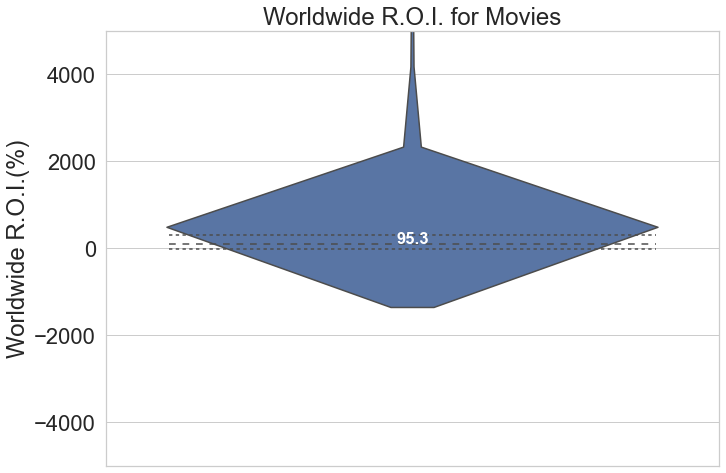

In [186]:
sns.set(style="whitegrid", font_scale=2)
fig = plt.figure(figsize = (11,8))
plt.axes(ylim=[-5000, 5000])#pre set for better appearance

#fliers are also outliers of data[1]
#This violin plot gives out a look at frequency of the data points based on the width of the graph.
ax = sns.violinplot(y='Worldwide R.O.I.(%)', data=dfGenre, showfliers=True, orient='v', inner='quartile', bw=0.2)

#This finds the median of the data and labels it in white on the boxplot[]
median = round(df['Worldwide R.O.I.(%)'].median(),1) #rounds to the nearest first decimal place
xtick = ax.get_xticks() #gets tick location
vertical_offset = median * 0.05 #offsets slightly off of the median line
ax.text(xtick, median + vertical_offset, median, horizontalalignment='center', size='x-small',color='w',weight='semibold')

ax.set_title('Worldwide R.O.I. for Movies')

plt.show()


We should keep in mind that we are looking for a genre that gives us around the median value of 95.3% or up to the 800%.

Each movie title has either an individual or multiple genres associated with it. Therefore, we will only look at the top 40 genre combinations.

In [187]:
genres40 = dfGenre.Genre.value_counts().head(40)#This looks at the frequencies of the top 40 genres in the data
genres40

Comedy, Drama, Romance                           204
Drama                                            196
Comedy, Drama                                    181
Comedy                                           179
Comedy, Romance                                  153
Drama, Romance                                   122
Documentary                                       81
Crime, Drama, Thriller                            78
Action, Adventure, Sci-Fi                         71
Action, Crime, Thriller                           68
Action, Crime, Drama, Thriller                    67
Crime, Drama, Mystery, Thriller                   62
Horror, Mystery, Thriller                         59
Action, Adventure, Thriller                       52
Animation, Adventure, Comedy, Family, Fantasy     49
Crime, Drama                                      48
Horror, Thriller                                  45
Action, Adventure, Sci-Fi, Thriller               45
Documentary, Short                            

In [19]:
genres40 = dfGenre.genre.value_counts().head(40)#This looks at the frequencies of the top 40 genres in the data
genres40

Comedy, Drama, Romance                           178
Comedy                                           159
Drama                                            149
Comedy, Drama                                    146
Comedy, Romance                                  142
Drama, Romance                                   107
Action, Adventure, Sci-Fi                         68
Horror, Mystery, Thriller                         65
Crime, Drama, Thriller                            63
Action, Crime, Drama, Thriller                    60
Horror, Thriller                                  59
Action, Crime, Thriller                           59
Crime, Drama, Mystery, Thriller                   58
Documentary                                       52
Action, Adventure, Thriller                       51
Drama, Thriller                                   43
Comedy, Crime                                     43
Action, Adventure, Sci-Fi, Thriller               42
Crime, Drama                                  

In [188]:
genrelist = list(genres40.keys())#converts the top 40 genres to a list
genrelist

['Comedy, Drama, Romance',
 'Drama',
 'Comedy, Drama',
 'Comedy',
 'Comedy, Romance',
 'Drama, Romance',
 'Documentary',
 'Crime, Drama, Thriller',
 'Action, Adventure, Sci-Fi',
 'Action, Crime, Thriller',
 'Action, Crime, Drama, Thriller',
 'Crime, Drama, Mystery, Thriller',
 'Horror, Mystery, Thriller',
 'Action, Adventure, Thriller',
 'Animation, Adventure, Comedy, Family, Fantasy',
 'Crime, Drama',
 'Horror, Thriller',
 'Action, Adventure, Sci-Fi, Thriller',
 'Documentary, Short',
 'Comedy, Crime',
 'Drama, Thriller',
 'Action, Thriller',
 'Biography, Drama',
 'Biography, Drama, History',
 'Action, Comedy, Crime',
 'Drama, Mystery, Thriller',
 'Biography, Drama, Sport',
 'Action, Comedy, Crime, Thriller',
 'Horror',
 'Action, Adventure, Fantasy',
 'Horror, Mystery',
 'Action, Drama, Thriller',
 'Drama, Music',
 'Action, Sci-Fi, Thriller',
 'Comedy, Crime, Drama',
 'Short',
 'Action, Adventure, Fantasy, Sci-Fi',
 'Drama, Music, Romance',
 'Short, Drama',
 'Drama, Sport']

### Bar Graph of Movie Genre Variations

We plot a bar graph of these top 40 genre combinations to see which have the most number of movies. [2]

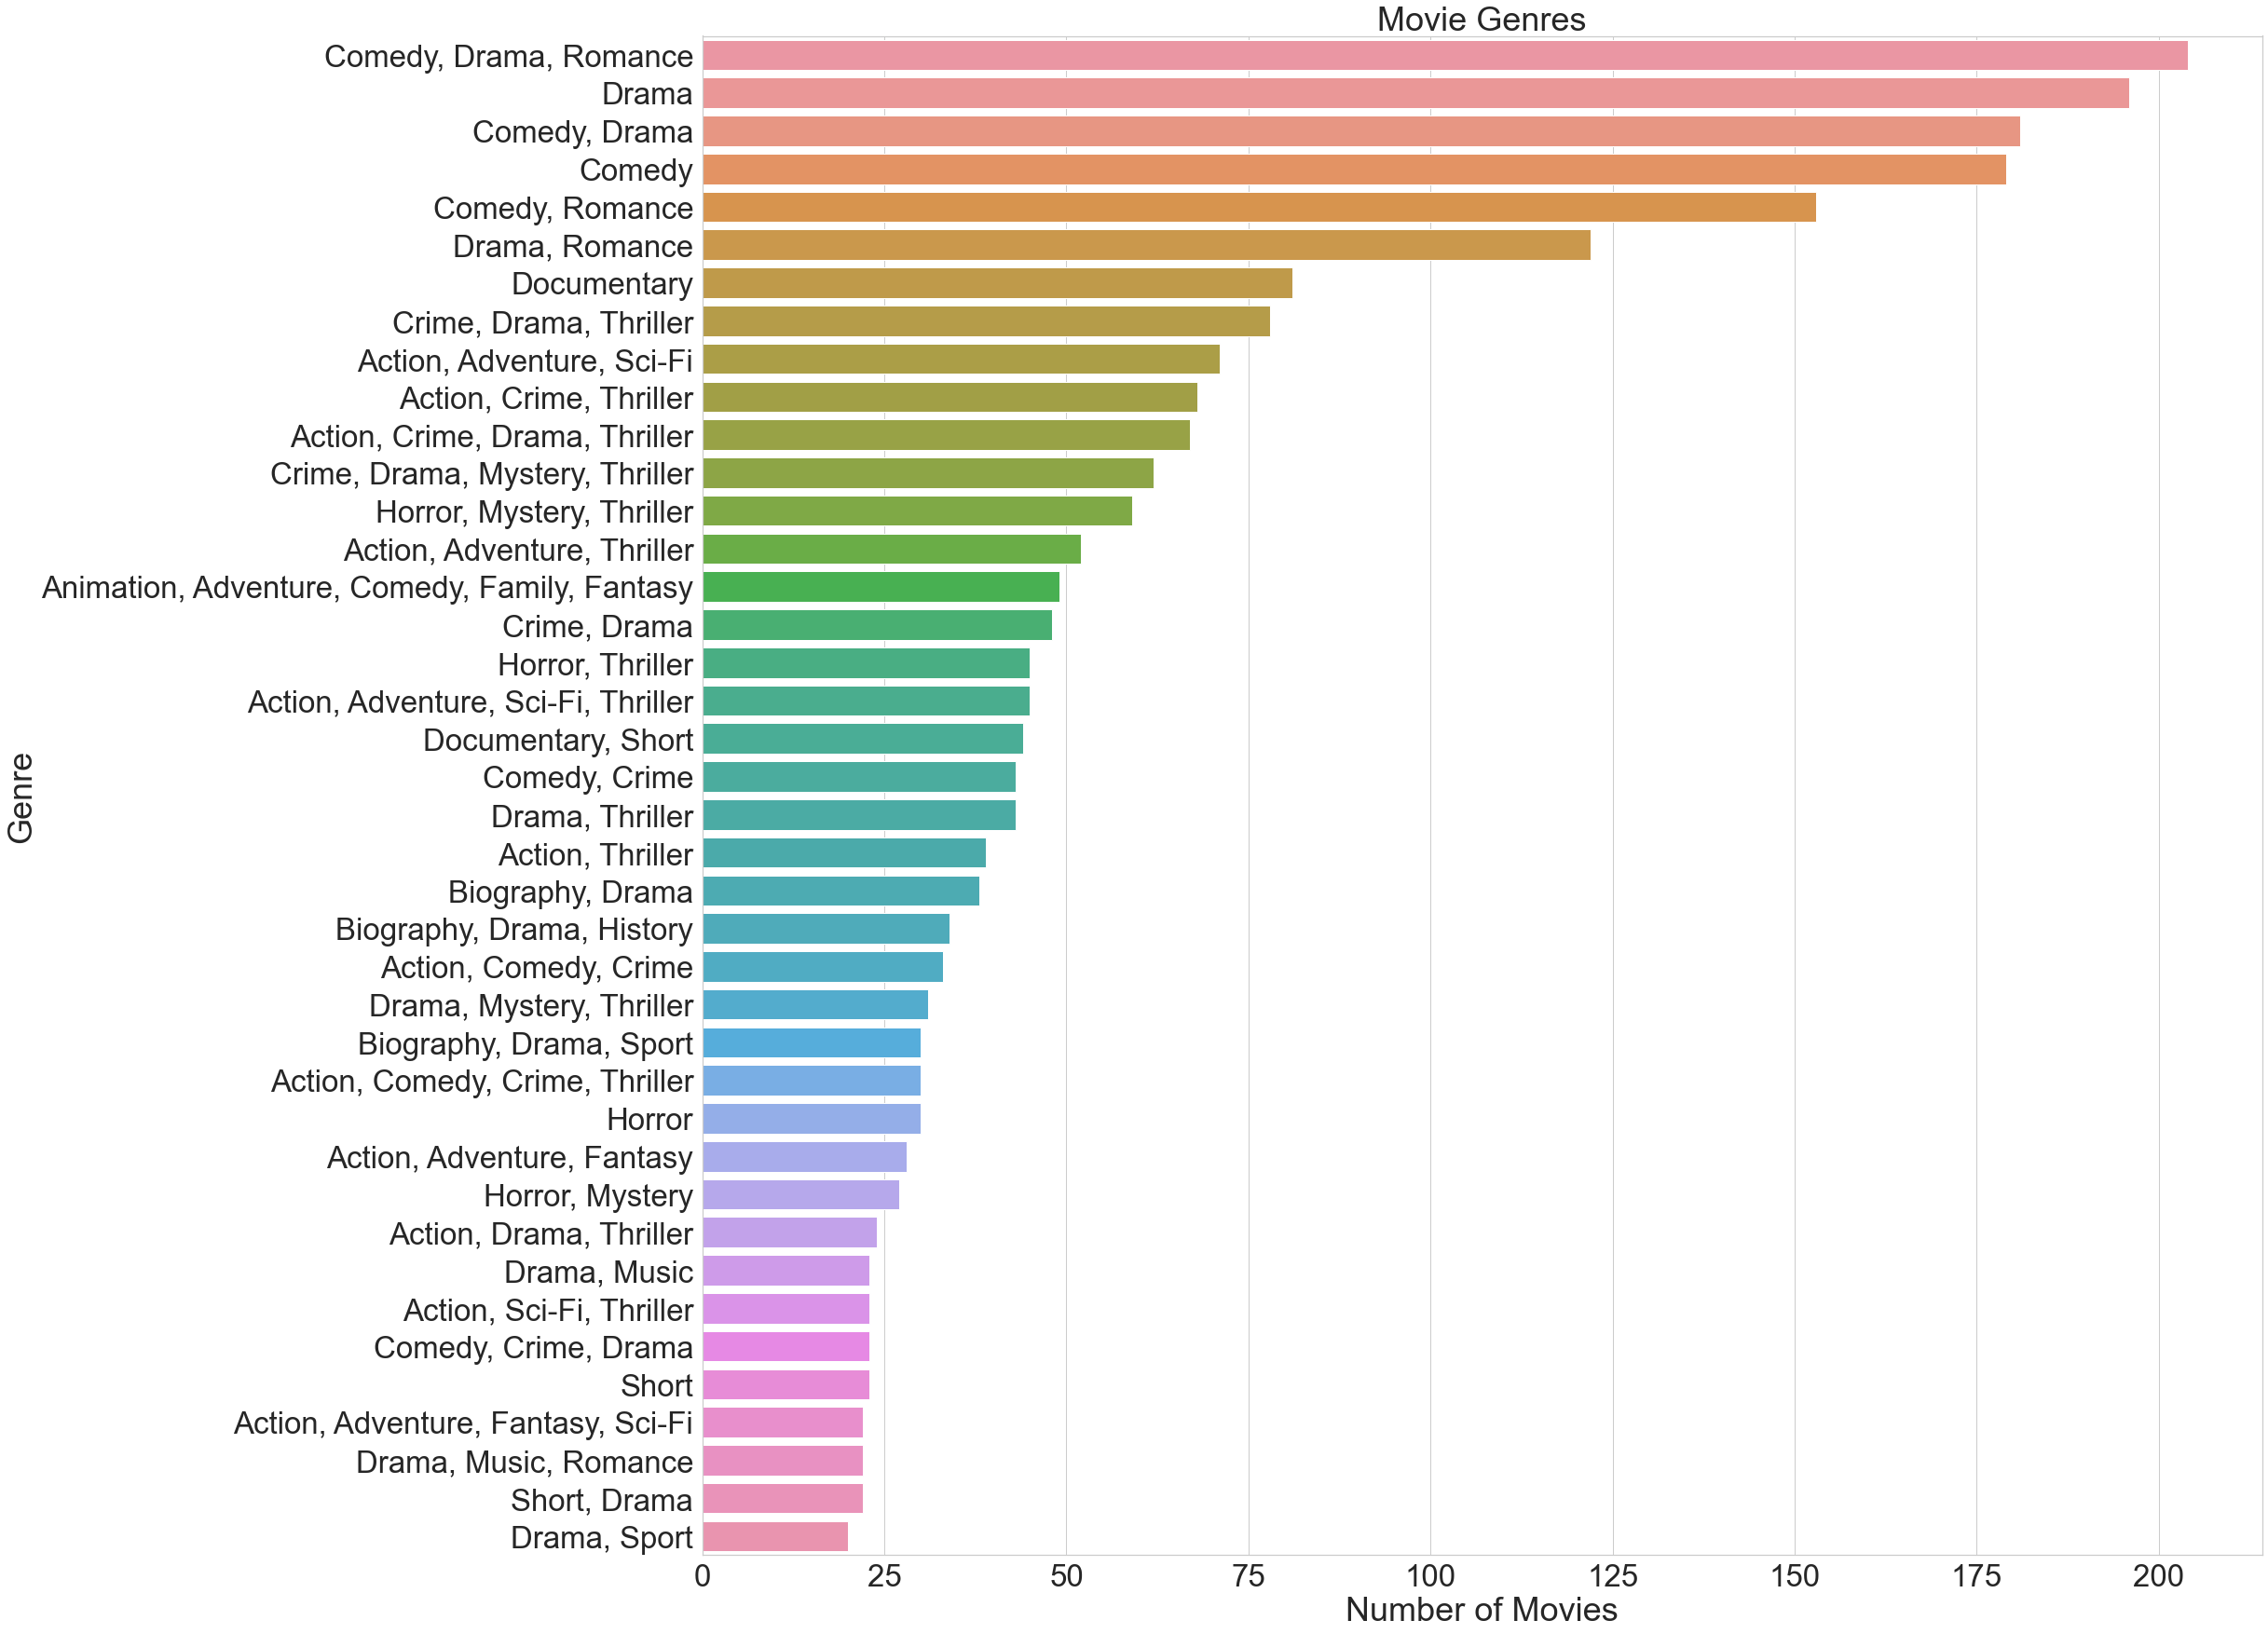

In [190]:
sns.set(style="whitegrid", font_scale=3)
fig = plt.figure(figsize = (30,30))
ax = sns.countplot(y='Genre', data=dfGenre, order=genrelist) #order= organizes your data by a given list
ax.set_title('Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')

plt.show()

### Box Plots of Movie Genre Variations

With these top 40 genres, we also look at their R.O.I.'s with box plots. [3]

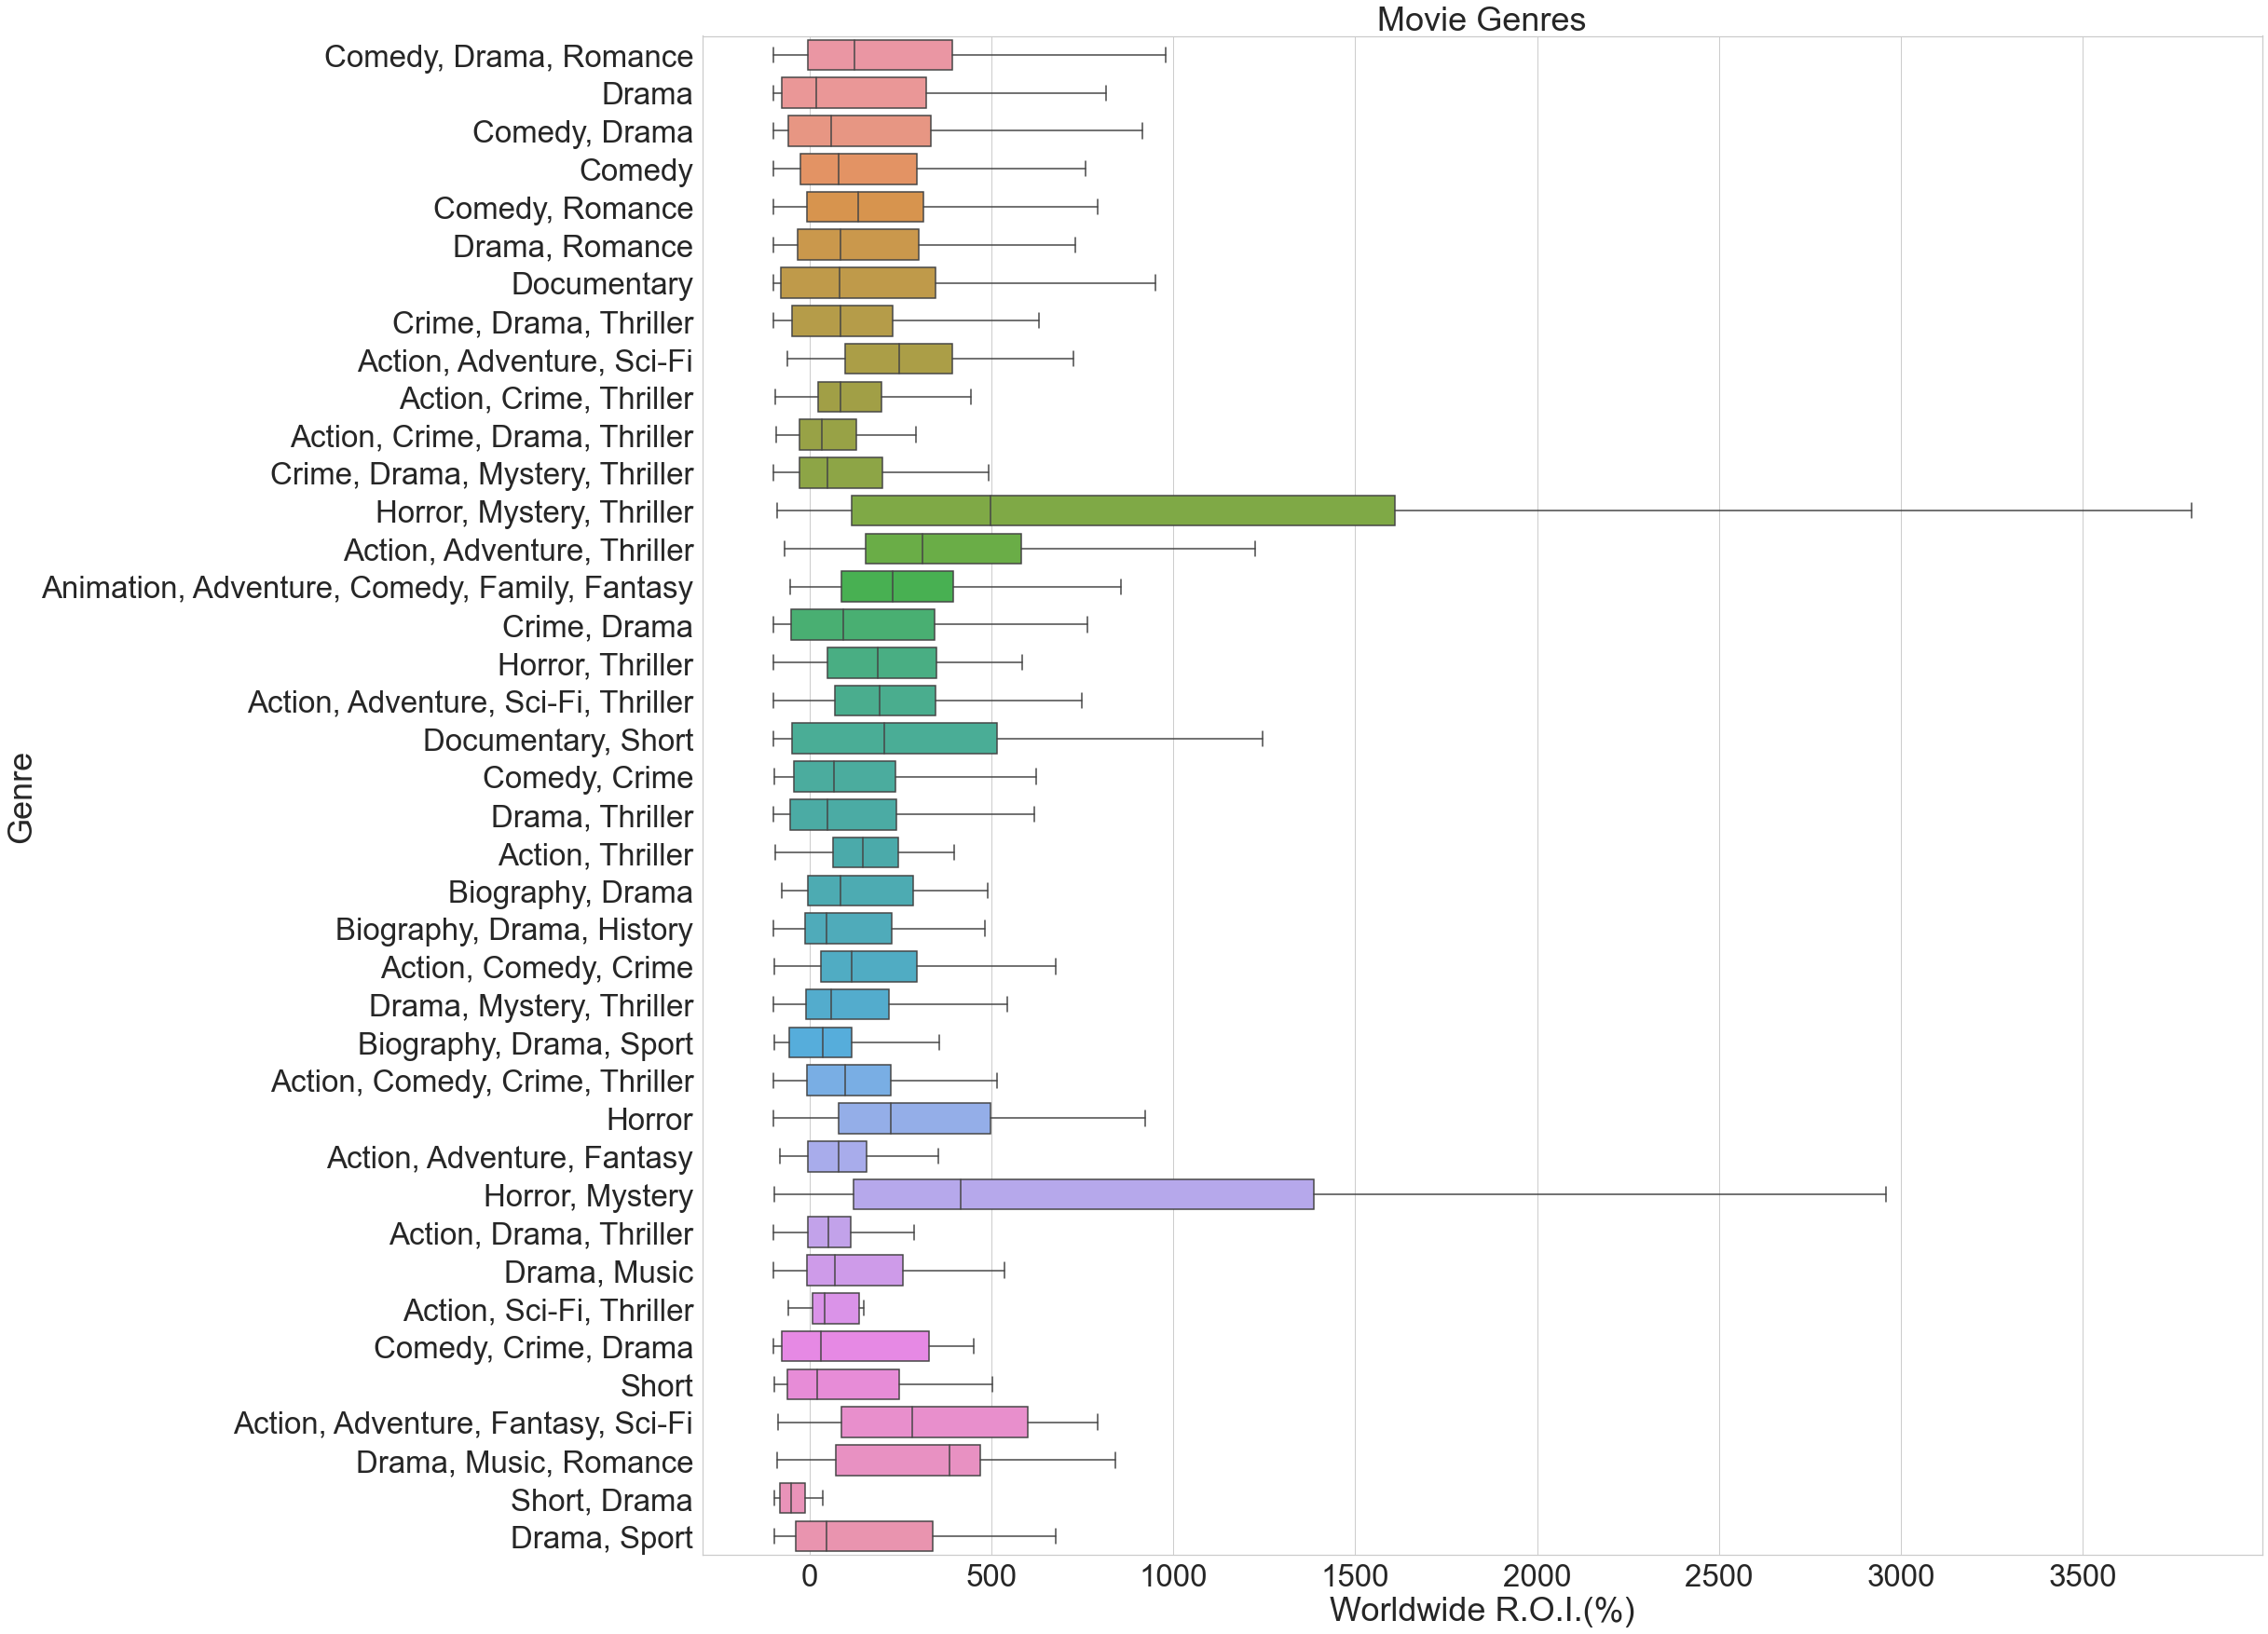

In [191]:
sns.set(style="whitegrid", font_scale=3)
fig = plt.figure(figsize = (30,30))
ax = sns.boxplot(y='Genre', x='Worldwide R.O.I.(%)', data=dfGenre, fliersize=10
            , showfliers=False, order=genrelist) #order= organizes your data by a given list
ax.set_title('Movie Genres')
plt.xlabel('Worldwide R.O.I.(%)')
plt.ylabel('Genre')

plt.show()

In the boxplot below, we limit the R.O.I. range to (95, 800) since we need to keep in mind the aforementioned R.O.I. of 95.3%.

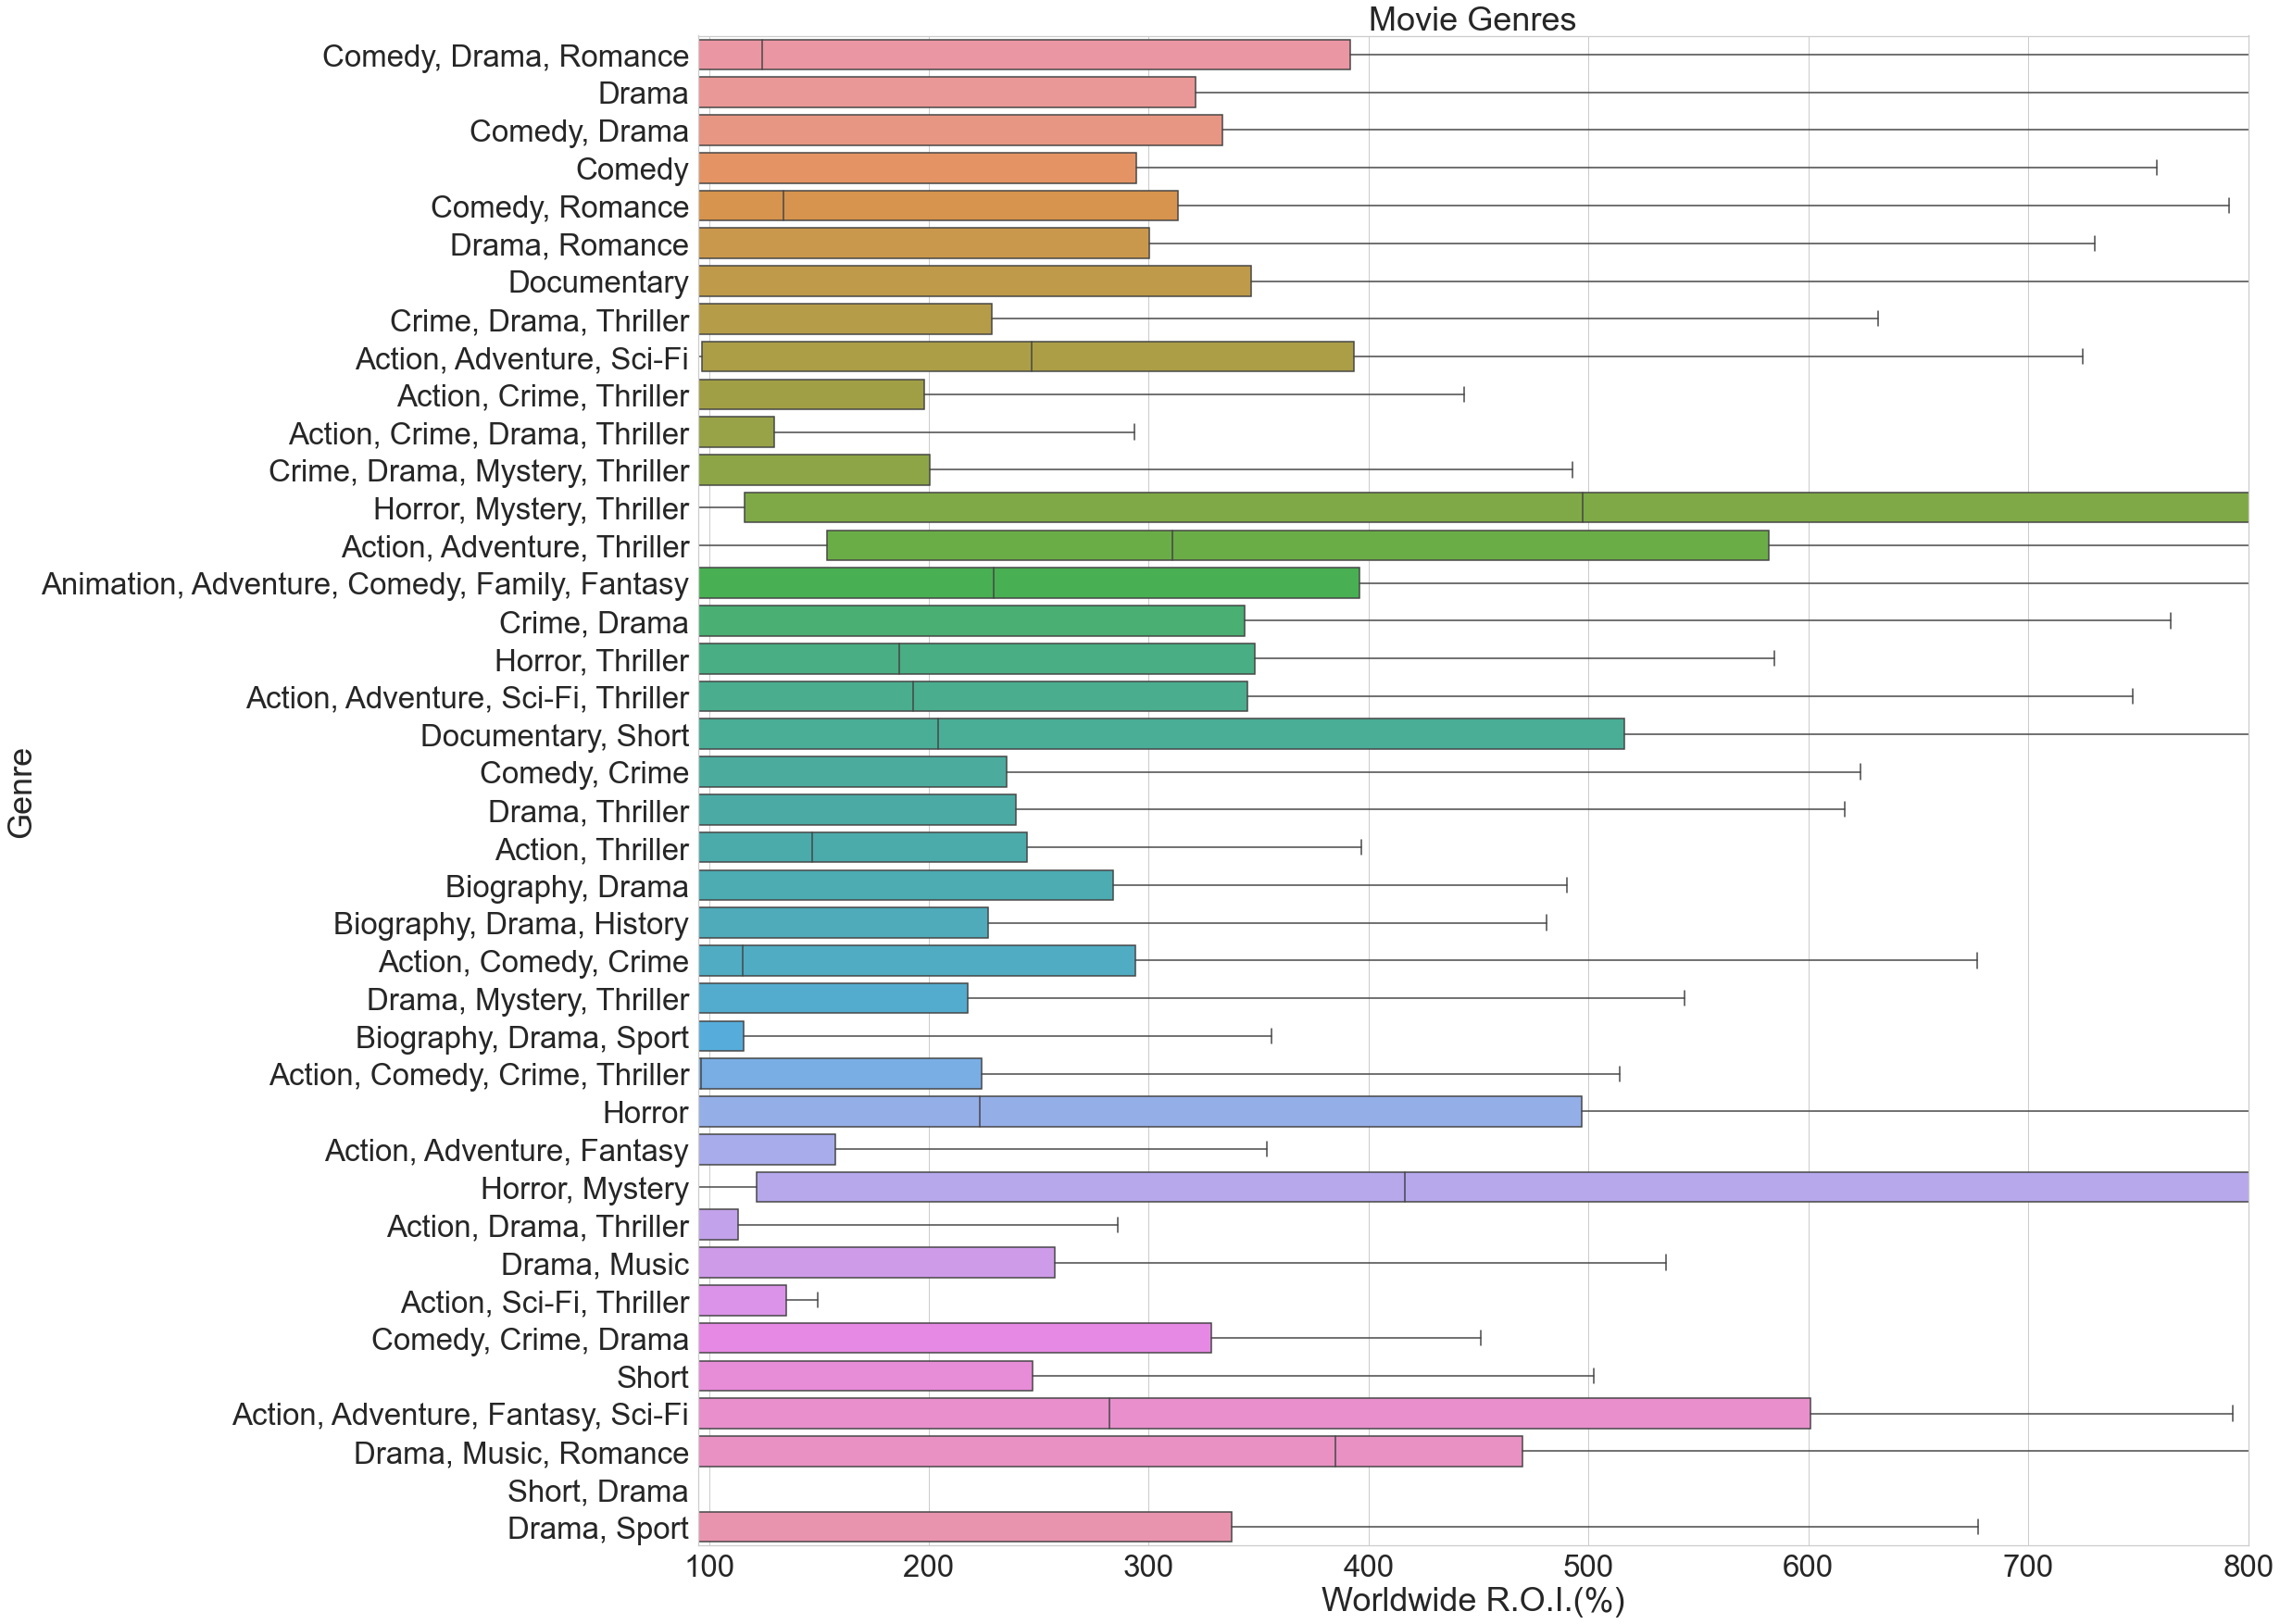

In [192]:
sns.set(style="whitegrid", font_scale=3)
fig = plt.figure(figsize = (30,30))
ax = sns.boxplot(y='Genre', x='Worldwide R.O.I.(%)', data=dfGenre, fliersize=10
            , showfliers=False, order=genrelist) #order= organizes your data by a given list
ax.set_title('Movie Genres')
ax.set_xlim(95, 800)
plt.xlabel('Worldwide R.O.I.(%)')
plt.ylabel('Genre')

plt.show()

From the above boxplot, we notice that movies do not appear to be constrained to only 1 genre. Another observation is that there are a lot of repeated genres. The some common genres that have a median value or 50% of the movies above 95.3% R.O.I. are Horror, Action, Adventure, and Thriller.

Next we will take a look at Maturity Rating.

## Maturity Rating Analysis

Let's look at our combined data again.

In [193]:
dfCombined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4869 entries, 0 to 4868
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                4869 non-null   object 
 1   Year_x               4869 non-null   object 
 2   Rated                4600 non-null   object 
 3   Released             4797 non-null   object 
 4   Runtime              4814 non-null   object 
 5   Genre                4858 non-null   object 
 6   Director             4782 non-null   object 
 7   Writer               4696 non-null   object 
 8   Actors               4833 non-null   object 
 9   Plot                 4747 non-null   object 
 10  Language             4853 non-null   object 
 11  Country              4866 non-null   object 
 12  Awards               4145 non-null   object 
 13  Poster               4735 non-null   object 
 14  Ratings              4775 non-null   object 
 15  Metascore            4225 non-null   f

We notice that 'rated' has 4185 objects and 'Worldwide R.O.I.(%)' has 4367 float64, so these need to match before we plot. Let's find any null values.

In [194]:
dfRated = dfCombined[~dfCombined.Rated.isnull()]#Check which movies have null in their 'rated' column

In [195]:
dfRated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4600 entries, 0 to 4868
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                4600 non-null   object 
 1   Year_x               4600 non-null   object 
 2   Rated                4600 non-null   object 
 3   Released             4587 non-null   object 
 4   Runtime              4598 non-null   object 
 5   Genre                4597 non-null   object 
 6   Director             4582 non-null   object 
 7   Writer               4554 non-null   object 
 8   Actors               4595 non-null   object 
 9   Plot                 4594 non-null   object 
 10  Language             4595 non-null   object 
 11  Country              4598 non-null   object 
 12  Awards               4107 non-null   object 
 13  Poster               4591 non-null   object 
 14  Ratings              4596 non-null   object 
 15  Metascore            4215 non-null   f

Now we see that the 'rated' and 'Worldwide R.O.I.(%)' match. Let's take a quick look at what ratings the movies have.

In [196]:
mrating = dfRated.Rated.value_counts()#This looks at the rating frequencies in the data
mrating

R            1983
PG-13        1522
PG            704
Not Rated     156
G             116
Approved       32
Unrated        24
Passed         23
NC-17           8
TV-14           7
TV-PG           6
TV-MA           5
X               4
M               2
TV-G            2
GP              2
M/PG            2
NOT RATED       1
UNRATED         1
Name: Rated, dtype: int64

We see that there are ratings that could fit into 'Not Rated', so let's makes those movies go into that category.[4]

In [198]:
dfRated[dfRated.Rated == 'Unrated'].Rated #This reveals at which index a movie is rated 'Not Rated'

960     Unrated
2551    Unrated
3565    Unrated
3665    Unrated
3749    Unrated
3870    Unrated
4024    Unrated
4031    Unrated
4041    Unrated
4137    Unrated
4202    Unrated
4221    Unrated
4245    Unrated
4287    Unrated
4301    Unrated
4311    Unrated
4340    Unrated
4541    Unrated
4548    Unrated
4770    Unrated
4776    Unrated
4779    Unrated
4810    Unrated
4818    Unrated
Name: Rated, dtype: object

In [199]:
list1 = list(dfRated[dfRated.Rated == 'Unrated'].Rated.keys()) #makes a list of the index values

In [29]:
list1 = list(dfRated[dfRated.rated == 'Unrated'].rated.keys()) #makes a list of the index values

In [30]:
dfnewupdate = pd.DataFrame({'rated':'Not Rated' }, index=list1) #makes new df for updating our current dataframe.

In [31]:
dfRated.update(dfnewupdate) #update dataframe [4]

C:\Users\johnh\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:5804: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


In [32]:
list1 = list(dfRated[dfRated.rated == 'UNRATED'].rated.keys()) #makes a list of the index values

In [33]:
dfnewupdate = pd.DataFrame({'rated':'Not Rated' }, index=list1)

In [34]:
dfRated.update(dfnewupdate)

In [35]:
list1 = list(dfRated[dfRated.rated == 'NOT RATED'].rated.keys()) #makes a list of the index values

In [36]:
dfnewupdate = pd.DataFrame({'rated':'Not Rated' }, index=list1)

In [37]:
dfRated.update(dfnewupdate)

In [40]:
mrating = dfRated.rated.value_counts()#This looks at the rating frequencies in the data #checks to see if everything worked.
mrating

R            1766
PG-13        1429
PG            677
Not Rated     130
G             118
Approved       22
Passed         21
NC-17           5
X               4
TV-PG           3
GP              3
TV-14           2
M               2
M/PG            1
TV-MA           1
PASSED          1
Name: rated, dtype: int64

### Bar Graph, Box Plot, and Violin Plot of Maturity Rating Vs. Worldwide R.O.I. and Number of Movies

Let's plot to see how many movies have certain ratings and how much R.O.I. each rating has.

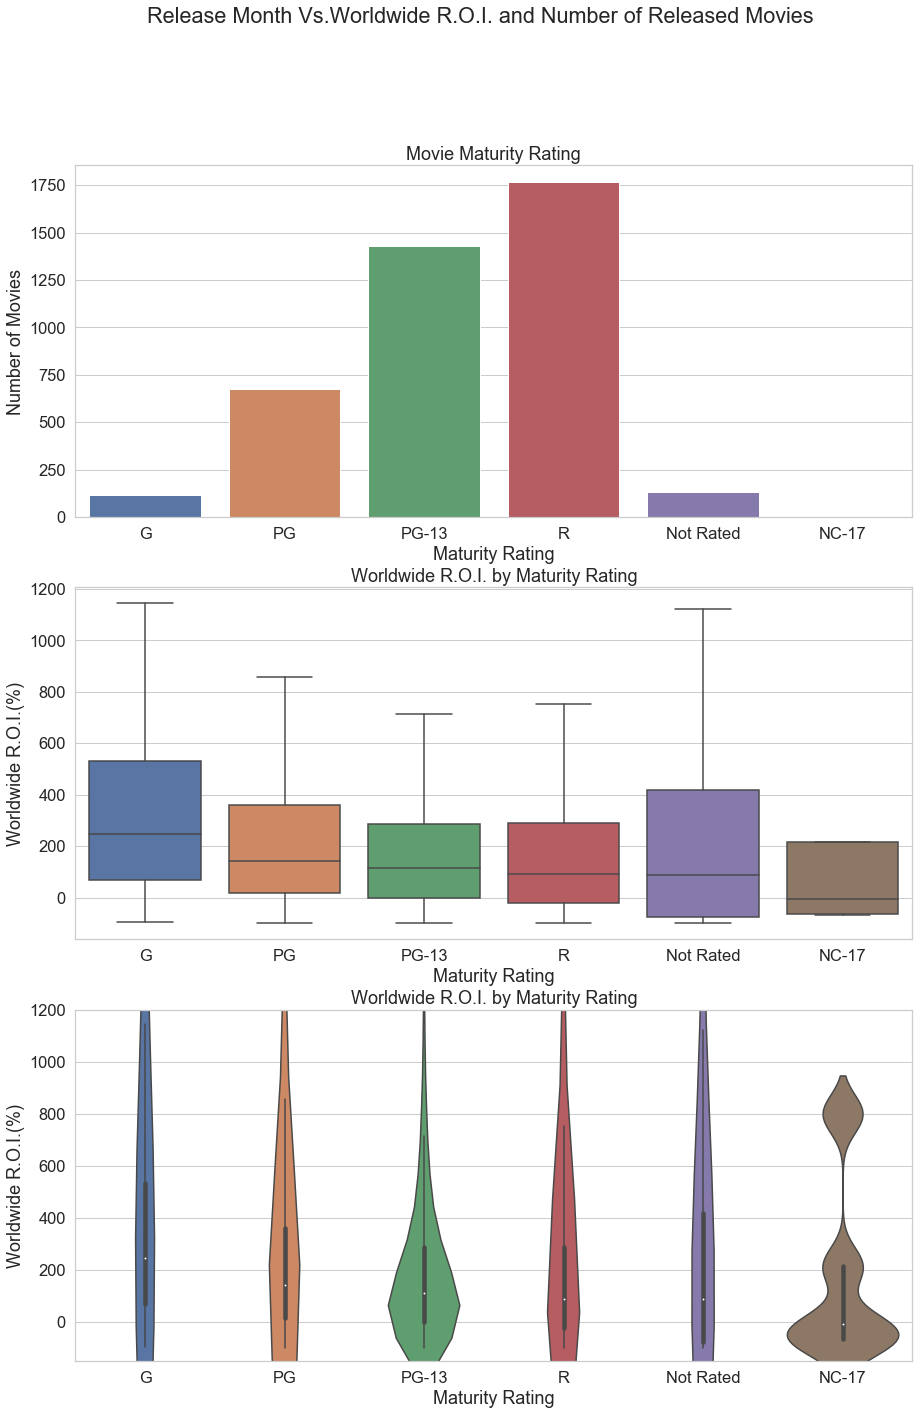

In [41]:
sns.set(style="whitegrid", font_scale=1.5)
fig, axes = plt.subplots(3,1, figsize = (15, 22))
fig.suptitle('Maturity Rating Vs. Worldwide R.O.I. and Number of Movies')

ax0 = axes[0]
ax0.set_title('Movie Maturity Rating')
sns.countplot(x='rated', data=dfRated, order=['G', 'PG', 'PG-13', 'R', 'Not Rated', 'NC-17'], ax=ax0)
ax0.set_ylabel('Number of Movies')
ax0.set_xlabel('Maturity Rating')



ax1 = axes[1]
ax1.set_title('Worldwide R.O.I. by Maturity Rating')

sns.boxplot(x='rated', y='Worldwide R.O.I.(%)', data=dfRated, fliersize=10
            , showfliers=False, order=['G', 'PG', 'PG-13', 'R', 'Not Rated', 'NC-17'], ax=ax1)
ax1.set_xlabel('Maturity Rating')



ax2 = axes[2]
ax2.set_ylim(-150, 1200)
ax2.set_title('Worldwide R.O.I. by Maturity Rating')

sns.violinplot(x='rated', y='Worldwide R.O.I.(%)', data=dfRated, fliersize=10
            , showfliers=False, order=['G', 'PG', 'PG-13', 'R', 'Not Rated', 'NC-17'], ax=ax2, bw=0.2)
ax2.set_xlabel('Maturity Rating')




plt.show()

From the above graphs, we can see that 'G' and 'PG' have the highest median values out of all the movie related ratings. In addition, ~75% of the movies made are above 0% R.O.I.

## Genre Analysis with Selected Maturity Ratings

We will plot the genres that have the most amount of movies which are 'PG-13' and 'R'

In [42]:
#This gets a list of the top 21 occuring genres for the two ratings.
ratGenre21 = list(dfRated[(dfRated.rated == 'PG-13') | (dfRated.rated == 'R') ].genre.value_counts().head(21).keys())
ratGenre21 

['Comedy, Drama, Romance',
 'Comedy',
 'Comedy, Romance',
 'Comedy, Drama',
 'Drama',
 'Drama, Romance',
 'Horror, Mystery, Thriller',
 'Crime, Drama, Thriller',
 'Action, Adventure, Sci-Fi',
 'Action, Crime, Drama, Thriller',
 'Action, Crime, Thriller',
 'Horror, Thriller',
 'Crime, Drama, Mystery, Thriller',
 'Drama, Thriller',
 'Comedy, Crime',
 'Action, Adventure, Sci-Fi, Thriller',
 'Crime, Drama',
 'Action, Adventure, Thriller',
 'Action, Thriller',
 'Biography, Drama',
 'Horror']

### Bar Graph of Movie Genre with Selected Maturity Rating

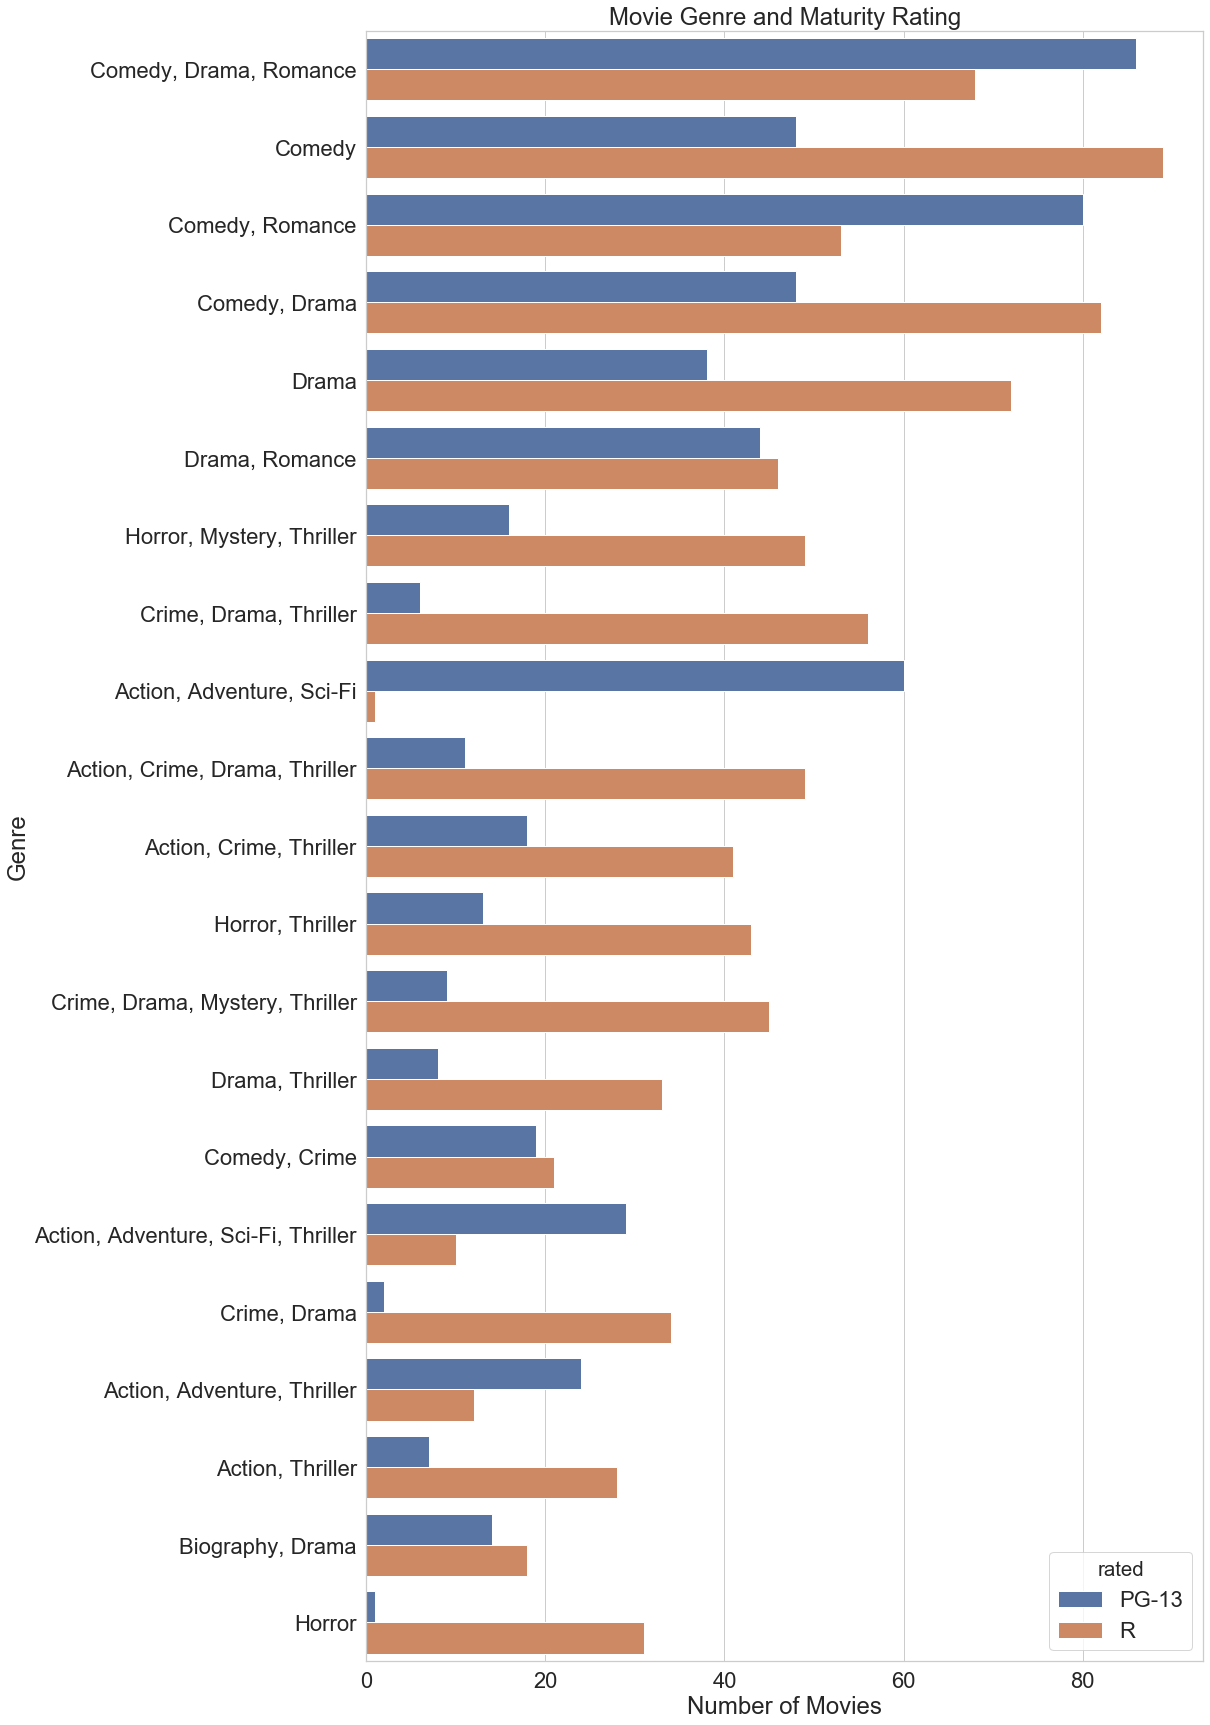

In [43]:
sns.set(style="whitegrid", font_scale=2)
fig = plt.figure(figsize = (15,30))
ax = sns.countplot(y='genre', data=dfRated, order=ratGenre21, hue='rated', hue_order=['PG-13', 'R']) #order= organizes your data by a given list
ax.set_title('Movie Genre and Maturity Rating')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')

plt.show()

 ### Box Plot of Movie Genre with Selected Maturity Rating

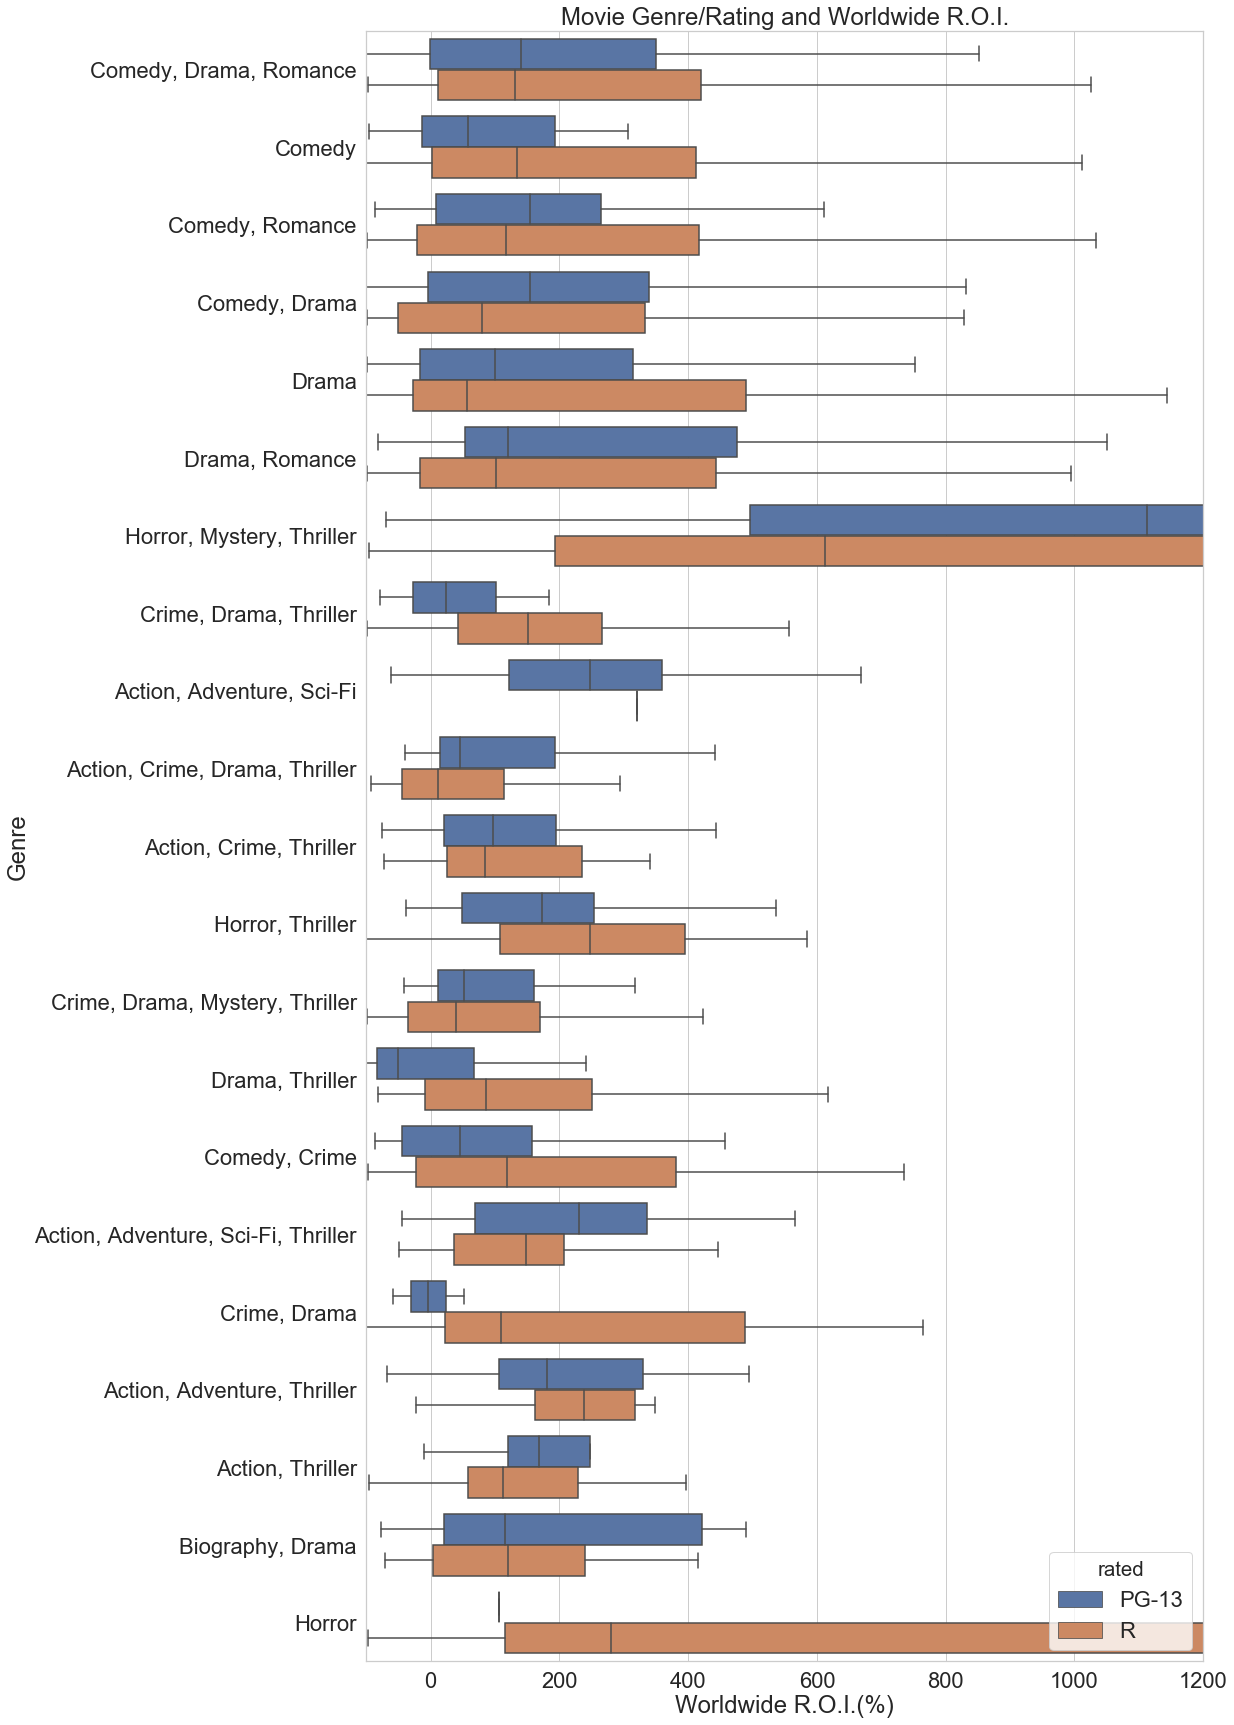

In [44]:
sns.set(style="whitegrid", font_scale=2)
fig = plt.figure(figsize = (15,30))
ax = sns.boxplot(y='genre', x='Worldwide R.O.I.(%)', data=dfRated, order=ratGenre21, hue='rated', hue_order=['PG-13', 'R']
                 , fliersize=10, showfliers=False) #order= organizes your data by a given list
ax.set_title('Movie Genre/Rating and Worldwide R.O.I.')
plt.xlabel('Worldwide R.O.I.(%)')
plt.ylabel('Genre')
ax.set_xlim(-100, 1200)
plt.show()

From the two above plots, we can recommend a PG-13 or R movie with Horror or Action/Adventure

## Resources used for development:
1. https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot
2. https://seaborn.pydata.org/generated/seaborn.countplot.html
3. https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot
4. https://en.wikipedia.org/wiki/Motion_Picture_Association_of_America_film_rating_system 
5. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.update.html
